<a href="https://colab.research.google.com/github/frzxw/EDA-6-data-mining/blob/main/EDA_Data_Mining_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok 6**
1.   2303573 Dina Agustina
2.   2305464 Mochamad Zidan Rusdhiana
3.   2307589 Fariz Wibisono
4.   2308355 Raffi Adzril Alfaiz
5.   2308744 Shizuka Maulia Putri



# **Pemanfaatan *Exploratory Data Analysis* untuk Mengurai Keterkaitan Upah, Ketenagakerjaan, dan Kemiskinan di Indonesia pada Tahun 2023**

## **Pendahuluan**

---

Keterkaitan antara upah, ketenagakerjaan, dan kemiskinan di Indonesia merupakan isu sosial-ekonomi yang kompleks dan saling memengaruhi. Fluktuasi upah dan kesempatan kerja berdampak langsung pada kesejahteraan masyarakat, terutama di daerah dengan ketimpangan ekonomi yang signifikan. Ketika upah tidak memadai dan lapangan kerja terbatas, angka kemiskinan cenderung meningkat. Hal ini memicu tekanan sosial yang lebih besar, khususnya di wilayah yang menghadapi kesenjangan ekonomi yang tinggi. Pemahaman yang mendalam tentang keterkaitan antara upah, ketenagakerjaan, dan kemiskinan menjadi penting untuk menemukan pola yang relevan dan solusi yang tepat sasaran. Melalui **Exploratory Data Analysis (EDA)**, penelitian ini bertujuan untuk mengidentifikasi pola, tren, dan hubungan antara upah, ketenagakerjaan, dan kemiskinan di Indonesia pada tahun 2023. Dengan analisis yang mendalam, penelitian ini diharapkan dapat memberikan wawasan yang lebih akurat tentang bagaimana ketiga variabel ini saling mempengaruhi, sehingga dapat menjadi landasan yang kuat bagi perumusan kebijakan yang lebih efektif dalam mengurangi kemiskinan dan meningkatkan kesejahteraan masyarakat di Indonesia.

## **Praproses**


---



### **Mengimpor Library dan Dataset**


---



Instal Library

In [ ]:
!pip install numpy pandas matplotlib seaborn geopandas

Impor Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Sebelum mengimpor dataset, dilakukan pivoting secara manual menggunakan Excel agar dataset dapat memiliki format header yang sesuai. Lalu, dilakukan standarisasi berupa perubahan beberapa nama kolom agar dapat merepresentasikan tiap-tiap kolom pada dataset.

Impor Dataset

In [ ]:
# Kelompok kemiskinan
garis_kemiskinan_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/garis_kemiskinan_provinsi_CLEANED.csv', skiprows=1)
gini_ratio_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/giniratio_provinsi_cleaned.csv', skiprows=1)
indeks_kedalaman_kemiskinan_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/indeks_kedalaman_kemiskinan_Provinsi_cleaned.csv', skiprows=1)
indeks_keparahan_kemiskinan_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/indeks_keparahan_kemiskinan_p2_provinsi_daerah_cleaned.csv', skiprows=1)
garis_kemiskinan_kota = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/garis_kemiskinan_kabupaten_kota_2016-2023_CLEANED.csv', skiprows=1)
jumlah_penduduk_miskin_kab_kota = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/jumlah_penduduk_miskin_kabupaten_kota_cleaned.csv', skiprows=1)
persentase_penduduk_miskin_p0_kab_kota = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/persentase_penduduk_miskin_p0_kabupaten_kota_2004-2024.csv', skiprows=1)
persentase_di_bawah_garis_kemiskinan_jenis_kelamin = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/persentase_penduduk_di_bawah_garis_kemiskinan_nasional_jenis_kelamin_2015-2023.csv', skiprows=1)
jumlah_penduduk_miskin_wilayah = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/jumlah_penduduk_miskin_wilayah_cleaned.csv', skiprows=1)

# Kelompok kependudukan
jumlah_penduduk_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kependudukan/jumlah_penduduk_2015-2024.csv', skiprows=1)
penduduk_di_bawah_50_persen_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kemiskinan/penduduk_di_bawah_50_persen_median_pendapatan_provinsi_2018-2024.csv', skiprows=1)

# Kelompok ketenagakerjaan
angkatan_kerja_gol_umur = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/angkatan_kerja_golongan_umur_2016-2023.csv', skiprows=1)
bukan_angkatan_kerja_gol_umur = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/bukan_angkatan_kerja_golongan_umur_2016-2023.csv', skiprows=1)
persentase_angkatan_kerja = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/persentase_angkatan_kerja_penduduk_usia_kerja_golongan_umur_2018-2024.csv', skiprows=1)
tingkat_pengangguran_terbuka_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/tingkat_pengangguran_terbuka_provinsi.csv', skiprows=1)
persentase_usia_15_24_tidak_sekolah_bekerja_pelatihan = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kependudukan/persentase_usia_15-24_tidak_sekolah_bekerja_pelatihan_2015-2024.csv', skiprows=1)
persentase_partisipasi_angkatan_kerja_jenis_kelamin = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kependudukan/tingkat_partisipasi_angkatan_kerja_jenis_kelamin_2018-2023.csv', skiprows=1)
persentase_tenaga_kerja_formal = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/persentase_tenaga_kerja_formal_provinsi_2015-2023.csv', skiprows=1)
tingkat_setengah_pengangguran = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/ketenagakerjaan/tingkat_setengah_pengangguran.csv', skiprows=1)
jumlah_dan_persentase_bekerja_pengangguran = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/kependudukan/jumlah_persentase_penduduk_bekerja_pengangguran_2016-2023.csv', skiprows=1)

# Kelompok upah
upah_minimum_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/ump_provinsi_2023.csv', skiprows=1)
rata_upah_perjam_provinsi = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/rata_upah_per_jam_provinsi_2016-2023.csv', skiprows=1)
rata_upah_perjam_jenis_kelamin = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/rata_upah_jenis_kelamin.csv', skiprows=1)
rata_upah_perjam_tempat_tinggal = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/rata_upah_perjam_tempat_tinggal.csv', skiprows=1)
rata_upah_perjam_tingkat_pendidikan = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/rata_upah_per_jam_tingkat_pendidikan_2016-2023.csv', skiprows=1)
rata_upah_perjam_sektor = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/upah/rata_upah_sektor_2016-2023.csv', skiprows=1)

# Kelompok umum
rata_inflasi_indonesia = pd.read_csv('https://raw.githubusercontent.com/frzxw/EDA-6-data-mining/refs/heads/main/cleaned/rata_inflasi_indonesia_2016-2023.csv', skiprows=1)

### **Informasi Data**

---



Menampilkan head (lima baris pertama) dari berbagai dataset dalam beberapa kelompok, seperti kemiskinan, kependudukan, kriminalitas, ketenagakerjaan, dan upah.

In [ ]:
# Membuat fungsi yang dapat menampilkan head dari banyak dataset
def show_head(dataset):
  for name, df in dataset.items():
    print(f"\nDataset: {name}")
    print(df.head())
    print("-" * 80)

In [ ]:
# Mengelompokan dataset kemiskinan
ds_kemiskinan = {
    'garis_kemiskinan_kota': garis_kemiskinan_kota,
    'garis_kemiskinan_provinsi': garis_kemiskinan_provinsi,
    'gini_ratio_provinsi': gini_ratio_provinsi,
    'indeks_kedalaman_kemiskinan_provinsi': indeks_kedalaman_kemiskinan_provinsi,
    'indeks_keparahan_kemiskinan_provinsi': indeks_keparahan_kemiskinan_provinsi,
    'jumlah_penduduk_miskin_kab_kota': jumlah_penduduk_miskin_kab_kota,
    'jumlah_penduduk_miskin_wilayah': jumlah_penduduk_miskin_wilayah,
    'persentase_di_bawah_garis_kemiskinan_jenis_kelamin': persentase_di_bawah_garis_kemiskinan_jenis_kelamin,
    'persentase_penduduk_miskin_p0_kab_kota': persentase_penduduk_miskin_p0_kab_kota
}

show_head(ds_kemiskinan)


Dataset: garis_kemiskinan_kota
  NAMA WILAYAH  TAHUN GARIS KEMISKINAN (Rupiah/Kapita/Bulan)
0         ACEH   2016                                 410956
1         ACEH   2017                                 435454
2         ACEH   2018                                 464626
3         ACEH   2019                                 486935
4         ACEH   2020                                 522126
--------------------------------------------------------------------------------

Dataset: garis_kemiskinan_provinsi
  NAMA WILAYAH  TAHUN GARIS KEMISKINAN (Rupiah/kapita/bulan)
0         ACEH   2016                                 445488
1         ACEH   2017                                 479872
2         ACEH   2018                                 496752
3         ACEH   2019                                 517900
4         ACEH   2020                                 543685
--------------------------------------------------------------------------------

Dataset: gini_ratio_provinsi
  NAMA W

In [ ]:
# Mengelompokan dataset kemiskinan
ds_kependudukan = {
    'jumlah_penduduk_provinsi': jumlah_penduduk_provinsi,
    'penduduk_di_bawah_50_persen_provinsi': penduduk_di_bawah_50_persen_provinsi
}

show_head(ds_kependudukan)


Dataset: jumlah_penduduk_provinsi
  NAMA WILAYAH  TAHUN JUMLAH PENDUDUK (Ribu Jiwa)
0         ACEH   2015                        5002
1         ACEH   2016                        5096
2         ACEH   2017                        5190
3         ACEH   2018                      5243.4
4         ACEH   2019                      5316.3
--------------------------------------------------------------------------------

Dataset: penduduk_di_bawah_50_persen_provinsi
  NAMA WILAYAH  TAHUN  \
0         ACEH   2018   
1         ACEH   2019   
2         ACEH   2020   
3         ACEH   2021   
4         ACEH   2022   

  JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)  
0                                              11.14                 
1                                              10.17                 
2                                               9.53                 
3                                               9.98                 
4                                   

In [ ]:
# Mengelompokan dataset ketenagakerjaan
ds_ketenagakerjaan = {
    'angkatan_kerja_gol_umur': angkatan_kerja_gol_umur,
    'bukan_angkatan_kerja_gol_umur': bukan_angkatan_kerja_gol_umur,
    'persentase_angkatan_kerja': persentase_angkatan_kerja,
    'persentase_tenaga_kerja_formal': persentase_tenaga_kerja_formal,
    'tingkat_setengah_pengangguran': tingkat_setengah_pengangguran,
    'tingkat_pengangguran_terbuka_provinsi': tingkat_pengangguran_terbuka_provinsi,
    'jumlah_dan_persentase_bekerja_pengangguran': jumlah_dan_persentase_bekerja_pengangguran,
    'persentase_usia_15_24_tidak_sekolah_bekerja_pelatihan': persentase_usia_15_24_tidak_sekolah_bekerja_pelatihan,
    'persentase_partisipasi_angkatan_kerja_jenis_kelamin': persentase_partisipasi_angkatan_kerja_jenis_kelamin
}

show_head(ds_ketenagakerjaan)


Dataset: angkatan_kerja_gol_umur
  GOLONGAN UMUR  TAHUN  JUMLAH AK
0         15-19   2016    6219598
1         15-19   2017    7096466
2         15-19   2018    6125710
3         15-19   2019    6195241
4         15-19   2020    6674405
--------------------------------------------------------------------------------

Dataset: bukan_angkatan_kerja_gol_umur
  GOLONGAN UMUR  TAHUN  JUMLAH BAK
0         15-19   2016    15950244
1         15-19   2017    16978531
2         15-19   2018    15902737
3         15-19   2019    15915285
4         15-19   2020    15443547
--------------------------------------------------------------------------------

Dataset: persentase_angkatan_kerja
  GOLONGAN UMUR  TAHUN  AK TPAK (Persen)
0         15-19   2018             28.10
1         15-19   2019             27.65
2         15-19   2020             28.65
3         15-19   2021             28.39
4         15-19   2022             27.74
--------------------------------------------------------------------

In [ ]:
# Mengelompokan dataset upah
ds_upah = {
    'rata_upah_perjam_jenis_kelamin': rata_upah_perjam_jenis_kelamin,
    'rata_upah_perjam_tempat_tinggal': rata_upah_perjam_tempat_tinggal,
    'rata_upah_perjam_provinsi': rata_upah_perjam_provinsi,
    'rata_upah_perjam_tingkat_pendidikan': rata_upah_perjam_tingkat_pendidikan,
    'rata_upah_perjam_sektor': rata_upah_perjam_sektor,
    'upah_minimum_provinsi': upah_minimum_provinsi
}

show_head(ds_upah)


Dataset: rata_upah_perjam_jenis_kelamin
  JENIS KELAMIN  TAHUN  RATA UPAH (Rupiah/jam) 
0     Laki-laki   2016                    14289
1     Laki-laki   2017                    15345
2     Laki-laki   2018                    15847
3     Laki-laki   2019                    16547
4     Laki-laki   2020                    17836
--------------------------------------------------------------------------------

Dataset: rata_upah_perjam_tempat_tinggal
  GOLONGAN WILAYAH  TAHUN  RATA UPAH (Rupiah/jam)
0             Kota   2016                   14289
1             Kota   2017                   16808
2             Kota   2018                   17326
3             Kota   2019                   17825
4             Kota   2020                   19651
--------------------------------------------------------------------------------

Dataset: rata_upah_perjam_provinsi
  NAMA WILAYAH  TAHUN RATA UPAH (Rupiah/jam)
0         ACEH   2016                  13627
1         ACEH   2017                  14

### **Penggabungan Data**


---



Menggabungkan beberapa dataset yang berkaitan

In [ ]:
# Menggabungkan dataset kemiskinan berdasarkan wilayah (NAMA WILAYAH) dan tahun (TAHUN).
df_kemiskinan = pd.merge(garis_kemiskinan_provinsi, gini_ratio_provinsi, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan = pd.merge(df_kemiskinan, indeks_kedalaman_kemiskinan_provinsi, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan = pd.merge(df_kemiskinan, indeks_keparahan_kemiskinan_provinsi, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan = pd.merge(df_kemiskinan, penduduk_di_bawah_50_persen_provinsi, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan.head()

,NAMA WILAYAH,TAHUN,GARIS KEMISKINAN (Rupiah/kapita/bulan),GINI RATIO,INDEKS KEDALAMAN KEMISKINAN,INDEKS KEPARAHAN KEMISKINAN,JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)
0,ACEH,2018,496752,0.318,2.8,0.72,11.14
1,ACEH,2019,517900,0.321,2.58,0.67,10.17
2,ACEH,2020,543685,0.319,2.85,0.83,9.53
3,ACEH,2021,577270,0.323,2.95,0.81,9.98
4,ACEH,2022,646232,0.291,2.9,0.78,7.35


In [ ]:
# Menggabungkan dataset kemiskinan kota kabupaten berdasarkan wilayah (NAMA WILAYAH) dan tahun (TAHUN).
df_kemiskinan_kota_kab = pd.merge(jumlah_penduduk_miskin_kab_kota, garis_kemiskinan_kota, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan_kota_kab = pd.merge(df_kemiskinan_kota_kab, persentase_penduduk_miskin_p0_kab_kota, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_kemiskinan_kota_kab.head()

,NAMA WILAYAH,TAHUN,JUMLAH (RIBU JIWA),GARIS KEMISKINAN (Rupiah/Kapita/Bulan),PENDUDUK MISKIN (Persen)
0,ACEH,2016.0,848.44,410956,16.73
1,ACEH,2017.0,872.61,435454,16.89
2,ACEH,2018.0,839.49,464626,15.97
3,ACEH,2019.0,819.44,486935,15.32
4,ACEH,2020.0,814.91,522126,14.99


In [ ]:
# Dataframe gabungan untuk jumlah angkatan kerja, jumlah bukan angkatan kerja, serta persentase angkatan kerja terhadap penduduk usia kerja menurut golongan umur
df_ak_bak = pd.merge(angkatan_kerja_gol_umur, bukan_angkatan_kerja_gol_umur, on=['GOLONGAN UMUR', 'TAHUN'])
df_ak_bak = pd.merge(df_ak_bak, persentase_angkatan_kerja, on=['GOLONGAN UMUR', 'TAHUN'])
df_ak_bak.head()

,GOLONGAN UMUR,TAHUN,JUMLAH AK,JUMLAH BAK,AK TPAK (Persen)
0,15-19,2018,6125710,15902737,28.10
1,15-19,2019,6195241,15915285,27.65
2,15-19,2020,6674405,15443547,28.65
3,15-19,2021,6146156,15973004,28.39
4,15-19,2022,6383796,15761387,27.74


In [ ]:
# Dataframe gabungan untuk tingkat setengah pengangguran, pengangguran terbuka, dan usia 15-24 tidak sekolah/bekerja/pelatihan
df_pengangguran = pd.merge(tingkat_setengah_pengangguran, tingkat_pengangguran_terbuka_provinsi, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_pengangguran = pd.merge(df_pengangguran, persentase_usia_15_24_tidak_sekolah_bekerja_pelatihan, on=['NAMA WILAYAH', 'TAHUN'], how='inner')
df_pengangguran.head()

,NAMA WILAYAH,TAHUN,TINGKAT SETENGAH PENGANGGURAN (Persen),TINGKAT PENGANGGURAN TERBUKA (Persen),USIA 15-24 TIDAK SEKOLAH/BEKERJA/PELATIHAN (Persen)
0,ACEH,2016,11.57,7.85,23.35
1,ACEH,2017,13.29,6.98,22.41
2,ACEH,2018,11.3,6.44,22.77
3,ACEH,2019,12.38,5.825,23.61
4,ACEH,2020,16.18,5.995,23.6


In [ ]:
# Mengambil rata-rata upah per jam untuk tahun 2023 dan menggabungkannya dengan data upah minimum berdasarkan 'NAMA WILAYAH'
rata_upah_perjam_2023 = rata_upah_perjam_provinsi[rata_upah_perjam_provinsi['TAHUN'] == 2023]
df_upah = pd.merge(upah_minimum_provinsi, rata_upah_perjam_2023, on='NAMA WILAYAH', how='inner')
df_upah.head()

,NAMA WILAYAH,UPAH MINIMUM (Rupiah),TAHUN,RATA UPAH (Rupiah/jam)
0,ACEH,3413666,2023,17585
1,SUMATERA UTARA,2710493,2023,17609
2,SUMATERA SELATAN,3404177,2023,16273
3,SUMATERA BARAT,2742476,2023,16694
4,BENGKULU,2400000,2023,17410


### **Pembersihan Data**


---



Melakukan pembersihan yang meliputi penghapusan duplikasi, penanganan nilai yang hilang, koreksi kesalahan, definisi tipe data, penanganan outlier, dan normalisasi data untuk memastikan kualitas dan konsistensi data.

In [ ]:
# Dictionary bernama dfs_dict yang menyimpan berbagai DataFrame dan variabel terkait, seperti data kemiskinan, pengangguran, upah, dan persentase tenaga kerja
dfs_dict = {
    'df_kemiskinan': df_kemiskinan,
    'df_kemiskinan_kota_kab': df_kemiskinan_kota_kab,
    'df_ak_bak': df_ak_bak,
    'df_pengangguran': df_pengangguran,
    'df_upah' : df_upah,
    'persentase_tenaga_kerja_formal': persentase_tenaga_kerja_formal,
    'rata_upah_perjam_provinsi': rata_upah_perjam_provinsi,
    'jumlah_penduduk_provinsi': jumlah_penduduk_provinsi,
    'persentase_partisipasi_angkatan_kerja_jenis_kelamin': persentase_partisipasi_angkatan_kerja_jenis_kelamin,
    'penduduk_di_bawah_50_persen_provinsi' : penduduk_di_bawah_50_persen_provinsi
}

In [ ]:
# Looping untuk mengganti nilai string seperti '-' dan variannya menjadi NaN di setiap dataframe, lalu mereset index-nya.
for df_name, df in dfs_dict.items():
    df = df.copy()
    df.replace('-', np.nan, inplace=True)
    df.replace(' - ', np.nan, inplace=True)
    df.replace(' -', np.nan, inplace=True)
    df.replace('- ', np.nan, inplace=True)
    dfs_dict[df_name] = df.reset_index(drop=True)


In [ ]:
# Menghapus baris yang mengandung NaN dari setiap dataframe dan mereset index-nya kembali.
for df_name, df in dfs_dict.items():
    df = df.copy()
    df.dropna(inplace=True)
    dfs_dict[df_name] = df.reset_index(drop=True)


In [ ]:
# Drop kolom 'JENIS KELAMIN' pada dataframe persentase_partisipasi_angkatan_kerja_jenis_kelamin lalu menyalinnya ke dataframe baru persentase_tpak_kab_kota
persentase_partisipasi_angkatan_kerja_jenis_kelamin.drop('JENIS KELAMIN', axis=1, inplace=True)
persentase_tpak_kab_kota = persentase_partisipasi_angkatan_kerja_jenis_kelamin.copy()

In [ ]:
penduduk_di_bawah_50_persen_provinsi = penduduk_di_bawah_50_persen_provinsi[penduduk_di_bawah_50_persen_provinsi['TAHUN'] == 2023]
persentase_tpak_kab_kota = persentase_tpak_kab_kota[persentase_tpak_kab_kota['TAHUN'] == 2023]

In [ ]:
# Looping untuk memperbarui semua DataFrame dalam dfs_dict sehingga hanya menyimpan data untuk tahun 2023, serta memastikan bahwa tipe data kolom TAHUN konsisten dan numerik
for name, df in dfs_dict.items():
    if 'TAHUN' in df.columns:
        # Mengonversi tipe data kolom TAHUN ke numerik
        df['TAHUN'] = pd.to_numeric(df['TAHUN'], errors='coerce')

        # Memfilter hanya data tahun 2023
        df_filtered = df[df['TAHUN'] == 2023].reset_index(drop=True)

        # Memperbarui DataFrame di dictionary dengan hasil filter
        dfs_dict[name] = df_filtered

## **Eksplorasi**

---





### **Statistik Deskriptif**


---



Mendapatkan ringkasan statistik dari beberapa kolom dalam DataFrame

In [ ]:
# Buat salinan dari subset dataframe
df_selected = df_kemiskinan[['GARIS KEMISKINAN (Rupiah/kapita/bulan)',
                               'GINI RATIO',
                               'INDEKS KEDALAMAN KEMISKINAN',
                               'INDEKS KEPARAHAN KEMISKINAN',
                               'JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)']].copy()

# Mengonversi kolom menjadi numerik
df_selected['GARIS KEMISKINAN (Rupiah/kapita/bulan)'] = pd.to_numeric(df_selected['GARIS KEMISKINAN (Rupiah/kapita/bulan)'], errors='coerce')
df_selected['GINI RATIO'] = pd.to_numeric(df_selected['GINI RATIO'], errors='coerce')
df_selected['INDEKS KEDALAMAN KEMISKINAN'] = pd.to_numeric(df_selected['INDEKS KEDALAMAN KEMISKINAN'], errors='coerce')
df_selected['INDEKS KEPARAHAN KEMISKINAN'] = pd.to_numeric(df_selected['INDEKS KEPARAHAN KEMISKINAN'], errors='coerce')
df_selected['JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)'] = pd.to_numeric(df_selected['JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)'], errors='coerce')

# Tampilkan deskripsi statistik (mean, std, min, max, dll.)
stats = df_selected.describe()

# Menambahkan median ke hasil
stats.loc['median'] = df_selected.median()
pd.set_option('display.float_format', '{:.2f}'.format)
stats


,GARIS KEMISKINAN (Rupiah/kapita/bulan),GINI RATIO,INDEKS KEDALAMAN KEMISKINAN,INDEKS KEPARAHAN KEMISKINAN,JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)
count,30.00,30.00,30.00,30.00,30.00
mean,588548.50,0.35,1.90,0.50,9.70
std,92005.57,0.04,1.25,0.44,6.17
min,437387.00,0.28,0.55,0.10,1.51
25%,514269.75,0.32,1.11,0.26,4.79
50%,599031.00,0.35,1.63,0.38,8.99
75%,652130.75,0.37,2.14,0.54,13.27
max,765617.00,0.45,6.25,2.15,23.89
median,599031.00,0.35,1.63,0.38,8.99


In [ ]:
# Buat salinan dari subset dataframe
df_selected = df_kemiskinan_kota_kab[['JUMLAH (RIBU JIWA)', 'GARIS KEMISKINAN (Rupiah/Kapita/Bulan)', 'PENDUDUK MISKIN (Persen)']].copy()

# Konversi kolom menjadi numerik
df_selected['JUMLAH (RIBU JIWA)'] = pd.to_numeric(df_selected['JUMLAH (RIBU JIWA)'], errors='coerce')
df_selected['GARIS KEMISKINAN (Rupiah/Kapita/Bulan)'] = pd.to_numeric(df_selected['GARIS KEMISKINAN (Rupiah/Kapita/Bulan)'], errors='coerce')
df_selected['PENDUDUK MISKIN (Persen)'] = pd.to_numeric(df_selected['PENDUDUK MISKIN (Persen)'], errors='coerce')

# Tampilkan deskripsi statistik (mean, std, min, max, dll.)
stats = df_selected.describe()

# Menambahkan median ke hasil
stats.loc['median'] = df_selected.median()

# Menampilkan hasil dengan format float yang lebih rapi
pd.set_option('display.float_format', '{:.2f}'.format)
stats


,JUMLAH (RIBU JIWA),GARIS KEMISKINAN (Rupiah/Kapita/Bulan),PENDUDUK MISKIN (Persen)
count,273.00,281.00,280.00
mean,718.39,476987.34,10.86
std,1027.28,119299.73,5.57
min,41.12,20222.00,3.47
25%,191.70,390998.00,6.44
50%,335.21,459826.00,9.30
75%,806.82,548816.00,14.14
max,4617.01,874204.00,28.54
median,335.21,459826.00,9.30


In [ ]:
# Buat salinan dari subset dataframe
df_selected_pengangguran = df_pengangguran[[
                                              'TINGKAT SETENGAH PENGANGGURAN (Persen)',
                                              'TINGKAT PENGANGGURAN TERBUKA (Persen)',
                                              'USIA 15-24 TIDAK SEKOLAH/BEKERJA/PELATIHAN (Persen)']].copy()
# Konversi kolom menjadi numerik
df_selected_pengangguran['TINGKAT SETENGAH PENGANGGURAN (Persen)'] = pd.to_numeric(df_selected_pengangguran['TINGKAT SETENGAH PENGANGGURAN (Persen)'], errors='coerce')
df_selected_pengangguran['TINGKAT PENGANGGURAN TERBUKA (Persen)'] = pd.to_numeric(df_selected_pengangguran['TINGKAT PENGANGGURAN TERBUKA (Persen)'], errors='coerce')
df_selected_pengangguran['USIA 15-24 TIDAK SEKOLAH/BEKERJA/PELATIHAN (Persen)'] = pd.to_numeric(df_selected_pengangguran['USIA 15-24 TIDAK SEKOLAH/BEKERJA/PELATIHAN (Persen)'], errors='coerce')
# Tampilkan deskripsi statistik (mean, std, min, max, dll.)
stats_pengangguran = df_selected_pengangguran.describe()

# Menambahkan median ke hasil
stats_pengangguran.loc['median'] = df_selected_pengangguran.median()
pd.set_option('display.float_format', '{:.2f}'.format)

stats_pengangguran


,TINGKAT SETENGAH PENGANGGURAN (Persen),TINGKAT PENGANGGURAN TERBUKA (Persen),USIA 15-24 TIDAK SEKOLAH/BEKERJA/PELATIHAN (Persen)
count,35.00,35.00,35.00
mean,7.34,4.73,22.40
std,2.34,1.38,5.21
min,2.57,2.65,10.03
25%,5.89,3.52,20.27
50%,7.09,4.51,22.25
75%,8.88,5.57,24.27
max,12.83,7.75,35.38
median,7.09,4.51,22.25


In [ ]:
# Pastikan kolom yang relevan menjadi tipe data numerik (float)
df_upah['UPAH MINIMUM (Rupiah)'] = pd.to_numeric(df_upah['UPAH MINIMUM (Rupiah)'], errors='coerce')
df_upah['RATA UPAH (Rupiah/jam)'] = pd.to_numeric(df_upah['RATA UPAH (Rupiah/jam)'], errors='coerce')

# 1. Buat salinan dari subset dataframe
df_selected_upah = df_upah[['UPAH MINIMUM (Rupiah)', 'RATA UPAH (Rupiah/jam)']]

# 2. Tampilkan deskripsi statistik (mean, std, min, max, dll.)
stats_upah = df_selected_upah.describe()

# Menambahkan median ke hasil
stats_upah.loc['median'] = df_selected_upah.median()

# Mengatur format tampilan untuk menghindari notasi ilmiah
pd.set_option('display.float_format', '{:.2f}'.format)

stats_upah

,UPAH MINIMUM (Rupiah),RATA UPAH (Rupiah/jam)
count,34.00,34.00
mean,2922769.47,19662.03
std,602587.17,5664.10
min,1958169.00,12933.00
25%,2614771.75,16413.50
50%,2907397.00,18094.50
75%,3272321.00,20959.75
max,4901798.00,42354.00
median,2907397.00,18094.50


In [ ]:
# Buat salinan dari subset dataframe
df_selected_ak_bak = df_ak_bak[['JUMLAH AK', 'JUMLAH BAK', 'AK TPAK (Persen)']].copy()

# Mengonversi kolom menjadi numerik
df_selected_ak_bak['JUMLAH AK'] = pd.to_numeric(df_selected_ak_bak['JUMLAH AK'], errors='coerce')
df_selected_ak_bak['JUMLAH BAK'] = pd.to_numeric(df_selected_ak_bak['JUMLAH BAK'], errors='coerce')
df_selected_ak_bak['AK TPAK (Persen)'] = pd.to_numeric(df_selected_ak_bak['AK TPAK (Persen)'], errors='coerce')


# Tampilkan deskripsi statistik (mean, std, min, max, dll.)
stats_ak_bak = df_selected_ak_bak.describe()

# Menambahkan median ke hasil
stats_ak_bak.loc['median'] = df_selected_ak_bak.median()
pd.set_option('display.float_format', '{:.2f}'.format)
stats_ak_bak


,JUMLAH AK,JUMLAH BAK,AK TPAK (Persen)
count,11.00,11.00,11.00
mean,26855900.36,11796361.64,70.86
std,40223053.66,18137712.26,16.35
min,6338414.00,3291052.00,27.49
25%,14644151.50,3649571.50,70.50
50%,16594525.00,4933703.00,77.46
75%,17100946.50,10318896.50,80.41
max,147707452.00,64879989.00,82.10
median,16594525.00,4933703.00,77.46


### **Pengecekan Ulang Missing Values**
---

In [ ]:
# Memeriksa dan menampilkan jumlah nilai yang hilang (missing values) di beberapa DataFrame yang berbeda, termasuk df_kemiskinan, df_kemiskinan_kota_kab, df_ak_bak, dan df_pengangguran, serta mengatur tampilan output agar lebih jelas.
missing_values = {
    'DataFrame': [],
    'Missing Values': []
}


missing_values_df = pd.DataFrame(missing_values)
missing_values_df = missing_values_df.set_index('DataFrame')
missing_values_df = missing_values_df.apply(lambda x: x.astype(str))



# Transpose untuk tampilan yang lebih baik
print(missing_values_df.T)
print("Missing Values df_kemiskinan:")
print(df_kemiskinan.isnull().sum())

print("Missing Values df_kemiskinan_kota_kab:")
print(df_kemiskinan_kota_kab.isnull().sum())

print("Missing Values df_ak_bak:")
print(df_ak_bak.isnull().sum())

print("Missing Values df_pengangguran:")
print(df_pengangguran.isnull().sum())
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Hindari pemisahan frame ke banyak baris

Empty DataFrame
Columns: []
Index: [Missing Values]
Missing Values df_kemiskinan:
NAMA WILAYAH                                                         0
TAHUN                                                                0
GARIS KEMISKINAN (Rupiah/kapita/bulan)                               0
GINI RATIO                                                           0
INDEKS KEDALAMAN KEMISKINAN                                          0
INDEKS KEPARAHAN KEMISKINAN                                          0
JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)    0
dtype: int64
Missing Values df_kemiskinan_kota_kab:
NAMA WILAYAH                              0
TAHUN                                     0
JUMLAH PENDUDUK MISKIN (Ribu Jiwa)        0
GARIS KEMISKINAN (Rupiah/Kapita/Bulan)    0
PENDUDUK MISKIN (Persen)                  0
dtype: int64
Missing Values df_ak_bak:
GOLONGAN UMUR       0
TAHUN               0
JUMLAH AK           0
JUMLAH BAK          0
AK TPAK (Persen)    0


In [ ]:
# Mencari dan menampilkan semua baris yang memiliki nilai yang hilang dalam beberapa DataFrame
def find_missing_rows(df, df_name):
    # Mencari baris yang memiliki nilai missing
    missing_rows = df[df.isnull().any(axis=1)]
    if not missing_rows.empty:
        print(f'Baris Missing Values di {df_name}:')
        print(missing_rows)
        print()  # Baris kosong untuk pemisah

# Memeriksa setiap dataframe
find_missing_rows(df_kemiskinan, 'df_kemiskinan')
find_missing_rows(df_kemiskinan_kota_kab, 'df_kemiskinan_kota_kab')
find_missing_rows(df_ak_bak, 'df_ak_bak')
find_missing_rows(df_pengangguran, 'df_pengangguran')


## **Visualisasi**

---



###**Analisis Univariat**
---

Mempersiapkan data geografis peta Indonesia agar dapat digunakan secara konsisten dengan dataset lain yang memuat informasi wilayah provinsi.

In [ ]:
# Membaca file shapefile (.shp) yang berisi data geografis peta Indonesia, yang diunduh dari URL tertentu
peta_indonesia = gpd.read_file('https://github.com/frzxw/EDA-6-data-mining/raw/refs/heads/main/map/batas_prov.shp')

# Mengganti nama kolom 'NAME_1' menjadi 'NAMA WILAYAH' untuk penyeragaman nama kolom yang mewakili wilayah dalam data
peta_indonesia.rename(columns={'NAME_1': 'NAMA WILAYAH'}, inplace=True)

# Mengubah semua teks dalam kolom 'NAMA WILAYAH' menjadi huruf kapital untuk konsistensi format penamaan wilayah
peta_indonesia['NAMA WILAYAH'] = peta_indonesia['NAMA WILAYAH'].str.upper()

# Mengganti nama 'JAKARTA RAYA' menjadi 'DKI JAKARTA' agar sesuai dengan penamaan wilayah yang umum digunakan di dataset lain
peta_indonesia['NAMA WILAYAH'] = peta_indonesia['NAMA WILAYAH'].replace('JAKARTA RAYA', 'DKI JAKARTA')


Menghasilkan peta yang memvisualisasikan sebaran jumlah penduduk di setiap provinsi di Indonesia pada tahun 2023. Pertama, data penduduk difilter untuk tahun 2023 dan digabungkan dengan data geografis peta Indonesia. Kemudian, jumlah penduduk diubah menjadi angka numerik, dan nilai minimum, maksimum, serta tengah dihitung untuk menentukan skala warna peta. Peta tersebut ditampilkan dengan gradasi warna biru berdasarkan jumlah penduduk di setiap provinsi, serta dilengkapi dengan skala warna dan judul untuk memberikan informasi yang lebih jelas.

**Choropleth Map untuk Sebaran Jumlah Penduduk di Indonesia**

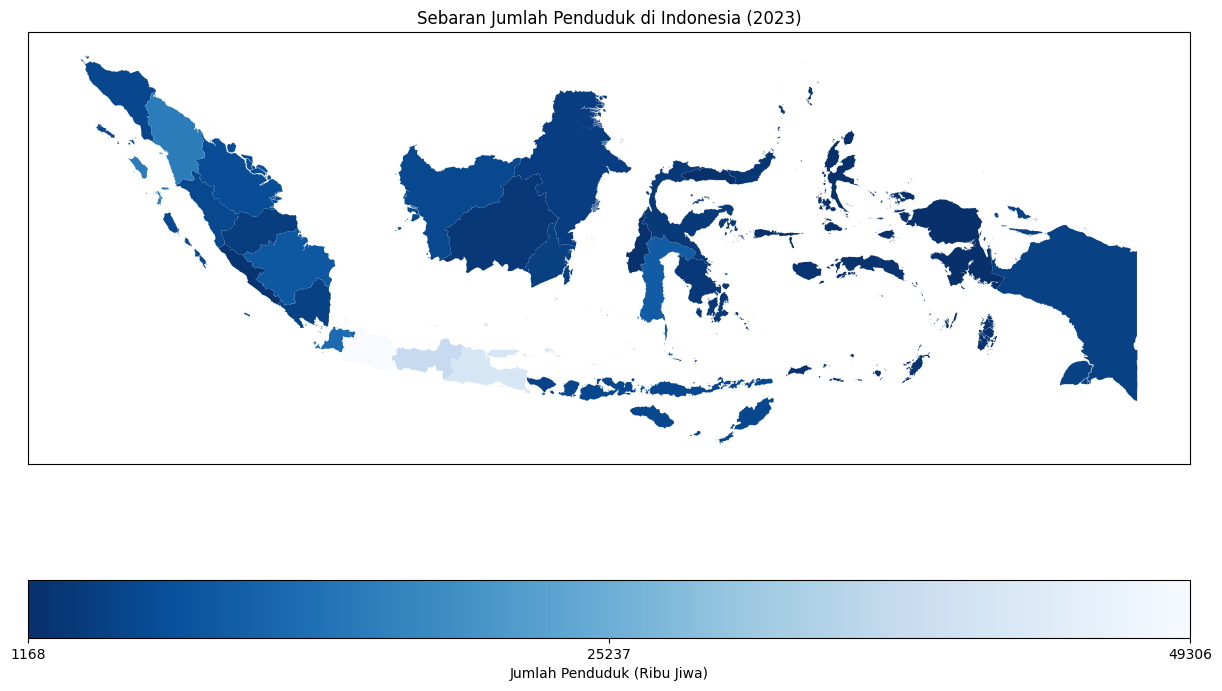

In [ ]:
# Filter data jumlah penduduk hanya untuk tahun 2023
jumlah_penduduk_provinsi = jumlah_penduduk_provinsi[jumlah_penduduk_provinsi['TAHUN'] == 2023]

# Gabungkan data peta Indonesia dengan data jumlah penduduk per provinsi menggunakan inner join
peta_penduduk = pd.merge(peta_indonesia, jumlah_penduduk_provinsi, on='NAMA WILAYAH', how='inner')

# Ubah kolom 'JUMLAH PENDUDUK (Ribu Jiwa)' menjadi tipe numerik, nilai yang tidak bisa dikonversi menjadi NaN
peta_penduduk['JUMLAH PENDUDUK (Ribu Jiwa)'] = pd.to_numeric(peta_penduduk['JUMLAH PENDUDUK (Ribu Jiwa)'], errors='coerce')

# Cari nilai minimum dari kolom 'JUMLAH PENDUDUK (Ribu Jiwa)'
min_value = peta_penduduk['JUMLAH PENDUDUK (Ribu Jiwa)'].min()

# Cari nilai maksimum dari kolom 'JUMLAH PENDUDUK (Ribu Jiwa)'
max_value = peta_penduduk['JUMLAH PENDUDUK (Ribu Jiwa)'].max()

# Hitung nilai tengah (midpoint) antara nilai minimum dan maksimum
mid_value = (max_value + min_value) / 2

# Buat figure dan axis untuk plot dengan ukuran 10x10 inci
fig, ax = plt.subplots(figsize=(15, 15))

# Plot peta Indonesia berdasarkan kolom 'JUMLAH PENDUDUK (Ribu Jiwa)' dengan skema warna 'Blues_r' (warna biru terbalik)
peta_penduduk.plot(column='JUMLAH PENDUDUK (Ribu Jiwa)', cmap='Blues_r', legend=False, ax=ax)

# Buat color map (skema warna) untuk visualisasi dengan range dari nilai minimum hingga maksimum
sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=plt.Normalize(vmin=min_value, vmax=max_value))

# Bersihkan atribut array dari color map (scalar mappable)
sm._A = []

# Tambahkan color bar pada figure, dengan orientasi horizontal dan jarak (pad) 0.1 dari plot
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.1)

# Beri label pada color bar
cbar.set_label('Jumlah Penduduk (Ribu Jiwa)')

# Atur nilai ticks pada color bar ke titik minimum, midpoint, dan maksimum
cbar.set_ticks([min_value, mid_value, max_value])

# Ubah label ticks pada color bar menjadi format integer (tanpa desimal)
cbar.set_ticklabels([int(min_value), int(mid_value), int(max_value)])

# Hapus tampilan label sumbu x dan sumbu y pada plot
ax.set_xticks([])
ax.set_yticks([])

# Beri judul pada plot
plt.title('Sebaran Jumlah Penduduk di Indonesia (2023)')

# Tampilkan plot
plt.show()


Berdasarkan plot sebaran jumlah penduduk di Indonesia tahun 2023, beberapa poin yang dapat disimpulkan:
- Jawa mendominasi populasi dengan jumlah penduduk tertinggi dibandingkan pulau lain, khususnya di bagian tengah pulau.
- Sumatera bagian utara memiliki populasi besar, terutama di provinsi seperti Sumatera Utara dan Riau.
- Wilayah Timur Indonesia, seperti Papua, memiliki jumlah penduduk yang relatif lebih rendah dibandingkan Jawa dan Sumatera.
- Provinsi di Kalimantan memiliki populasi yang bervariasi, tetapi tidak sepadat Jawa.
- Pulau-pulau kecil dan beberapa provinsi di Indonesia timur menunjukkan populasi yang lebih jarang, ditandai dengan warna biru yang lebih terang pada peta.
- Persebaran penduduk yang sangat tidak merata terlihat jelas, dengan kepadatan yang sangat terkonsentrasi di pulau-pulau tertentu seperti Jawa.
- Jawa-Bali sebagai pusat ekonomi Indonesia mencerminkan populasi besar yang terkonsentrasi di wilayah-wilayah ini.


**Choropleth Map untuk Sebaran Upah Minimum di Indonesia**

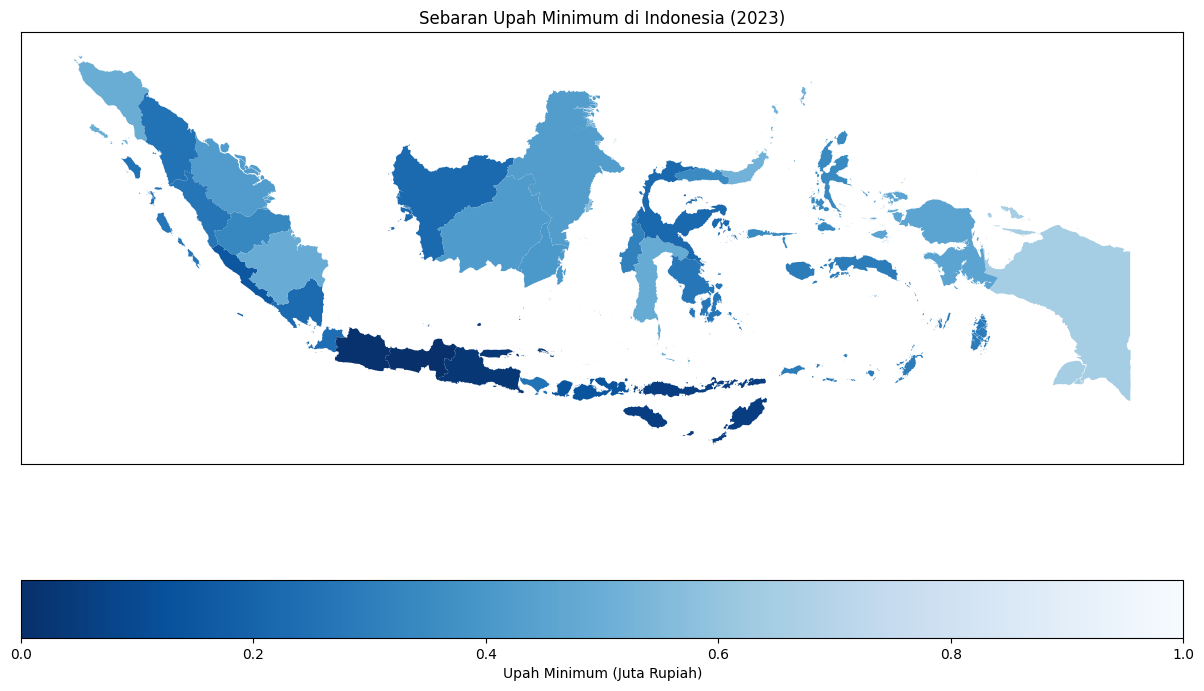

In [ ]:
# Pastikan kolom 'UPAH MINIMUM (Rupiah)' dalam format numerik
upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'] = pd.to_numeric(upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'], errors='coerce')

# Gabungkan peta dengan data upah minimum
peta_ump = peta_indonesia.merge(upah_minimum_provinsi[['NAMA WILAYAH', 'UPAH MINIMUM (Rupiah)']], how='inner')

# Pastikan kolom 'UPAH MINIMUM (Rupiah)' dalam format numerik di GeoDataFrame
peta_ump['UPAH MINIMUM (Rupiah)'] = pd.to_numeric(peta_ump['UPAH MINIMUM (Rupiah)'], errors='coerce')

# Buat plot peta
fig, ax = plt.subplots(figsize=(15, 15))
peta_ump.plot(column='UPAH MINIMUM (Rupiah)', cmap='Blues_r', legend=False, ax=ax)

# Tambahkan colorbar dengan normalisasi yang benar
sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=plt.Normalize(vmin=peta_ump['UPAH MINIMUM (Rupiah)'].min(), vmax=peta_ump['UPAH MINIMUM (Rupiah)'].max()))
sm._A = []  # Menghindari kesalahan

cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.1)
cbar.set_label('Upah Minimum (Juta Rupiah)')

# Hapus tick sumbu
ax.set_xticks([])
ax.set_yticks([])

# Judul plot
plt.title('Sebaran Upah Minimum di Indonesia (2023)')
plt.show()


- Jawa, khususnya Jawa Barat dan DKI Jakarta, memiliki upah minimum tertinggi di Indonesia.
- Provinsi di Sumatera seperti Sumatera Barat dan Riau memiliki upah minimum yang relatif tinggi dibandingkan dengan provinsi di Indonesia timur.
- Kalimantan, terutama bagian utara dan timur, juga memiliki upah minimum yang relatif tinggi.
- Indonesia bagian timur, termasuk Maluku dan Papua, memiliki upah minimum yang lebih rendah dibandingkan wilayah barat Indonesia.
- Perbedaan upah minimum antara wilayah barat dan timur Indonesia sangat mencolok, dengan wilayah barat umumnya lebih tinggi.
- Kesenjangan ekonomi antarwilayah tercermin dalam perbedaan upah minimum, di mana wilayah dengan aktivitas ekonomi tinggi seperti Jawa, Sumatera, dan Kalimantan cenderung memiliki upah lebih besar.
- Penyebaran pembangunan ekonomi di luar Jawa masih terbatas, terlihat dari rendahnya upah minimum di beberapa provinsi Indonesia Timur.


**Choropleth Map untuk Sebaran Rata-Rata Upah per Jam di Indonesia**

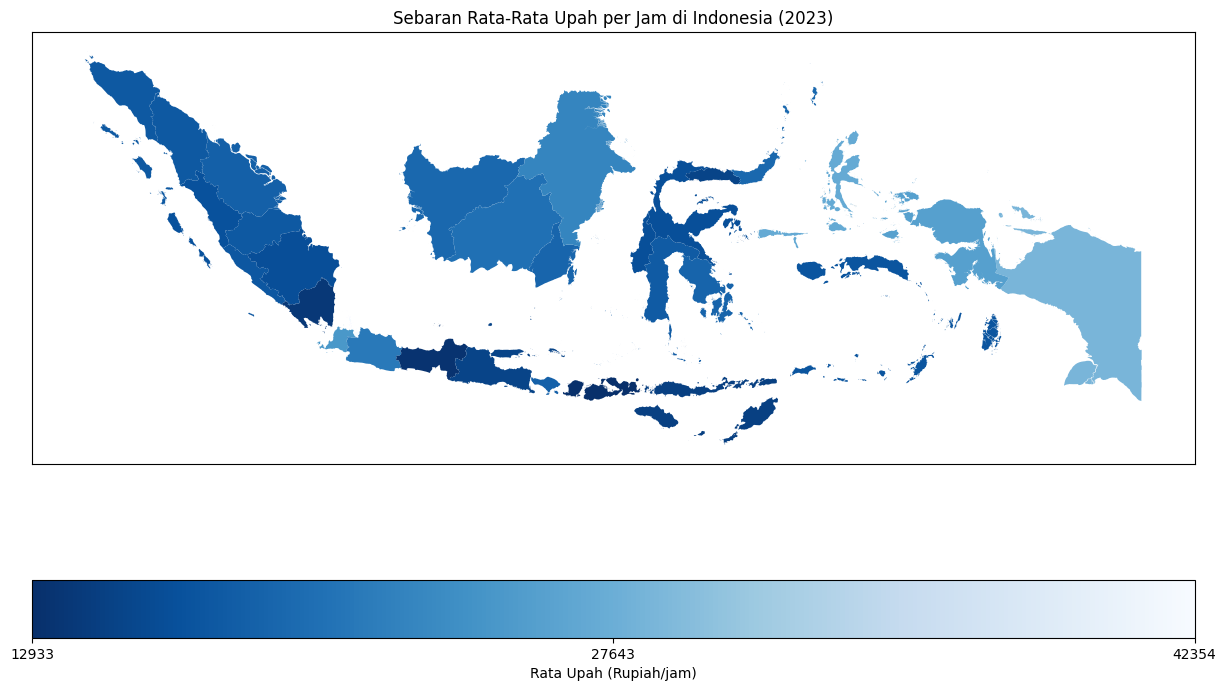

In [ ]:
# Gabungkan data peta Indonesia dengan data rata-rata upah per jam berdasarkan nama wilayah menggunakan inner join
peta_upah = pd.merge(peta_indonesia, rata_upah_perjam_provinsi, on='NAMA WILAYAH', how='inner')

# Ubah kolom 'RATA UPAH (Rupiah/jam)' menjadi tipe numerik, nilai yang tidak bisa dikonversi menjadi NaN
peta_upah['RATA UPAH (Rupiah/jam)'] = pd.to_numeric(peta_upah['RATA UPAH (Rupiah/jam)'], errors='coerce')

# Cari nilai minimum dari kolom 'RATA UPAH (Rupiah/jam)'
min_value = peta_upah['RATA UPAH (Rupiah/jam)'].min()

# Cari nilai maksimum dari kolom 'RATA UPAH (Rupiah/jam)'
max_value = peta_upah['RATA UPAH (Rupiah/jam)'].max()

# Hitung nilai tengah (midpoint) antara nilai minimum dan maksimum
mid_value = (max_value + min_value) / 2

# Buat figure dan axis untuk plot dengan ukuran 10x10 inci
fig, ax = plt.subplots(figsize=(15, 15))

# Plot peta Indonesia berdasarkan kolom 'RATA UPAH (Rupiah/jam)' dengan skema warna 'Blues_r' (warna biru terbalik)
peta_upah.plot(column='RATA UPAH (Rupiah/jam)', cmap='Blues_r', legend=False, ax=ax)

# Buat color map (skema warna) untuk visualisasi dengan range dari nilai minimum hingga maksimum
sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=plt.Normalize(vmin=min_value, vmax=max_value))

# Bersihkan atribut array dari color map (scalar mappable)
sm._A = []

# Tambahkan color bar pada figure, dengan orientasi horizontal dan jarak (pad) 0.1 dari plot
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.1)

# Beri label pada color bar
cbar.set_label('Rata Upah (Rupiah/jam)')

# Atur nilai ticks pada color bar ke titik minimum, midpoint, dan maksimum
cbar.set_ticks([min_value, mid_value, max_value])

# Ubah label ticks pada color bar menjadi format integer (tanpa desimal)
cbar.set_ticklabels([int(min_value), int(mid_value), int(max_value)])

# Hapus tampilan label sumbu x dan sumbu y pada plot
ax.set_xticks([])
ax.set_yticks([])

# Beri judul pada plot
plt.title('Sebaran Rata-Rata Upah per Jam di Indonesia (2023)')

# Tampilkan plot
plt.show()

Terdapat beberapa informasi dan hal yang menarik dari barplot di atas.
* Dipengaruhi oleh tingkat industrialisasi, pertumbuhan ekonomi, dan akses sumber daya menjadikan upah di Jawa, Sumatera, dan Kalimantan lebih tinggi.
* Memiliki upah per jam tertinggi, didorong oleh industri, pemerintahan, dan perdagangan di wilayah ini, terutama Jakarta menjadikan pulau Jawa dominan.
* Meskipun kaya mineral, upah per jam di Papua dan sekitarnya relatif rendah, mencerminkan ketidakmerataan distribusi pendapatan.
* Provinsi di timur Indonesia seperti Papua, Nusa Tenggara, dan Maluku memiliki upah lebih rendah dibanding provinsi di bagian barat. Hal ini menunjukkan kesenjangan ekonomi.


**Barplot untuk Garis Kemiskinan Provinsi**

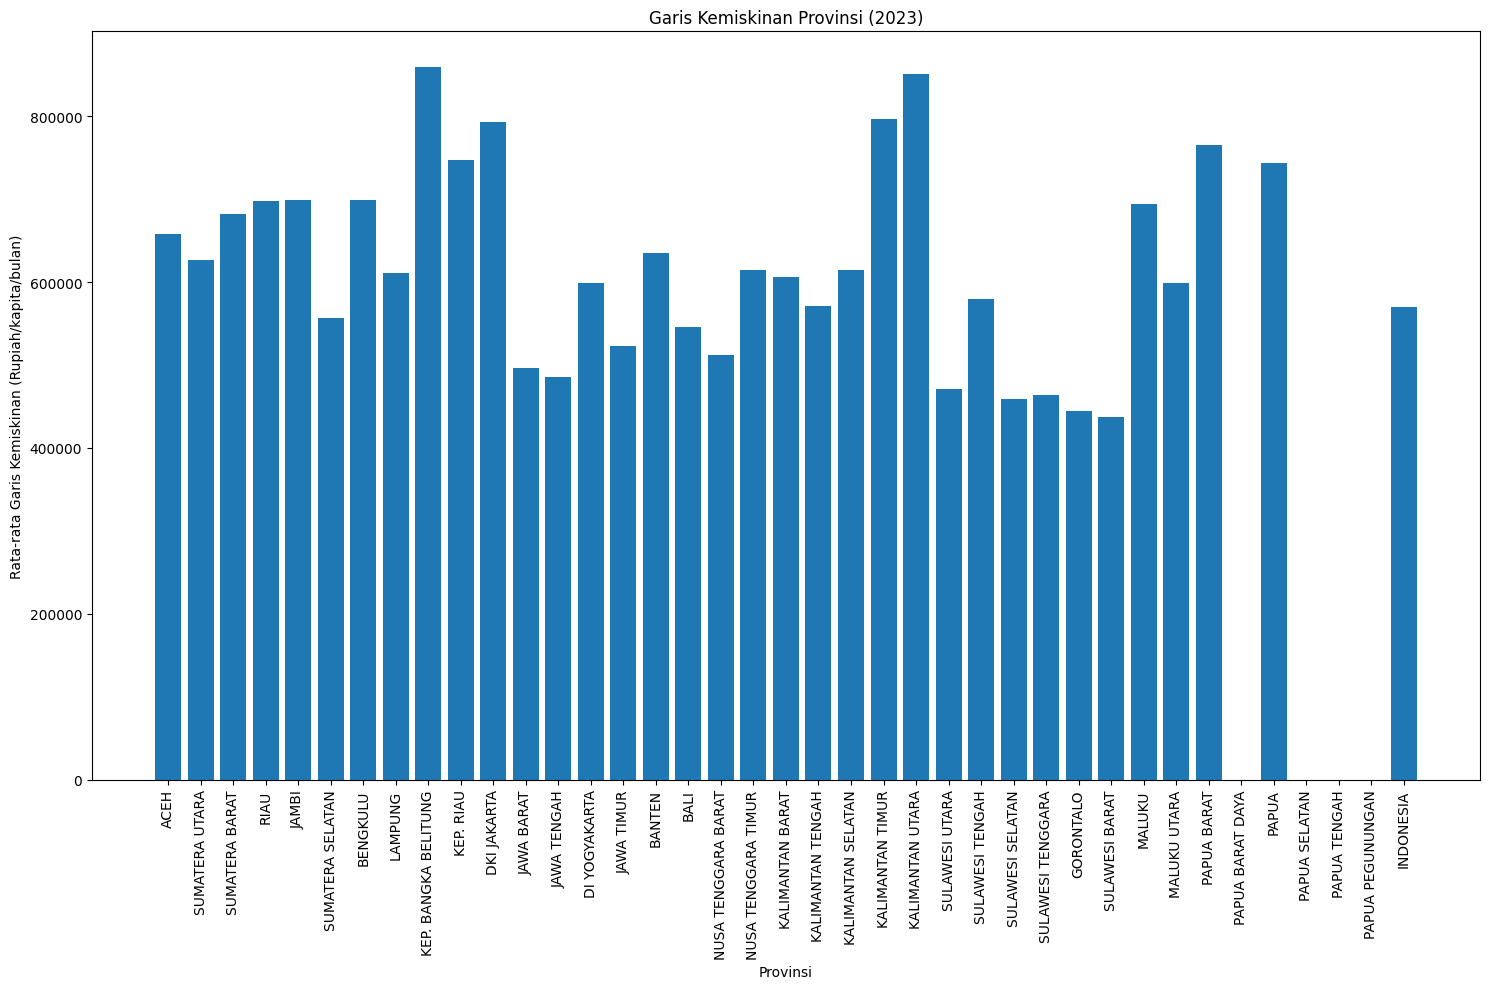

In [ ]:
# Pastikan kolom 'GARIS KEMISKINAN (Rupiah/kapita/bulan)' dalam format numerik
garis_kemiskinan_provinsi.loc[:, 'GARIS KEMISKINAN (Rupiah/kapita/bulan)'] = pd.to_numeric(garis_kemiskinan_provinsi['GARIS KEMISKINAN (Rupiah/kapita/bulan)'], errors='coerce')

# Buat barplot menggunakan Matplotlib
plt.figure(figsize=(15, 10))
plt.bar(garis_kemiskinan_provinsi['NAMA WILAYAH'], garis_kemiskinan_provinsi['GARIS KEMISKINAN (Rupiah/kapita/bulan)'])

# Setel label sumbu x dan y
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Garis Kemiskinan (Rupiah/kapita/bulan)')
plt.title('Garis Kemiskinan Provinsi (2023)')

# Rotasi label sumbu x untuk visibilitas yang lebih baik
plt.xticks(rotation=90)

# Atur tata letak dan tampilkan plot
plt.tight_layout()
plt.show()


Terdapat beberapa informasi dan hal yang menarik dari barplot diatas.
* Garis kemiskinan Indonesia sekitar 700.000 rupiah per kapita per bulan, lebih rendah dibandingkan provinsi seperti Papua, Papua Barat, dan Maluku Utara.
* Memiliki garis kemiskinan tertinggi, menunjukkan perbedaan signifikan antarprovinsi, dipengaruhi oleh biaya hidup dan ketersediaan sumber daya.
* Wilayah di Sumatera, Jawa, dan Kalimantan memiliki garis kemiskinan konsisten di 600.000-800.000 rupiah, dekat dengan rata-rata nasional.
* Provinsi seperti Papua menghadapi tantangan infrastruktur, sementara Jawa dan Sumatera diuntungkan oleh jaringan ekonomi yang lebih baik.
* Papua Barat Daya, Papua Selatan, Papua Tengah, dan Papua Pegunungan tidak memiliki data garis kemiskinan pada tahun 2023, mungkin karena mereka merupakan provinsi baru atau data belum tersedia.

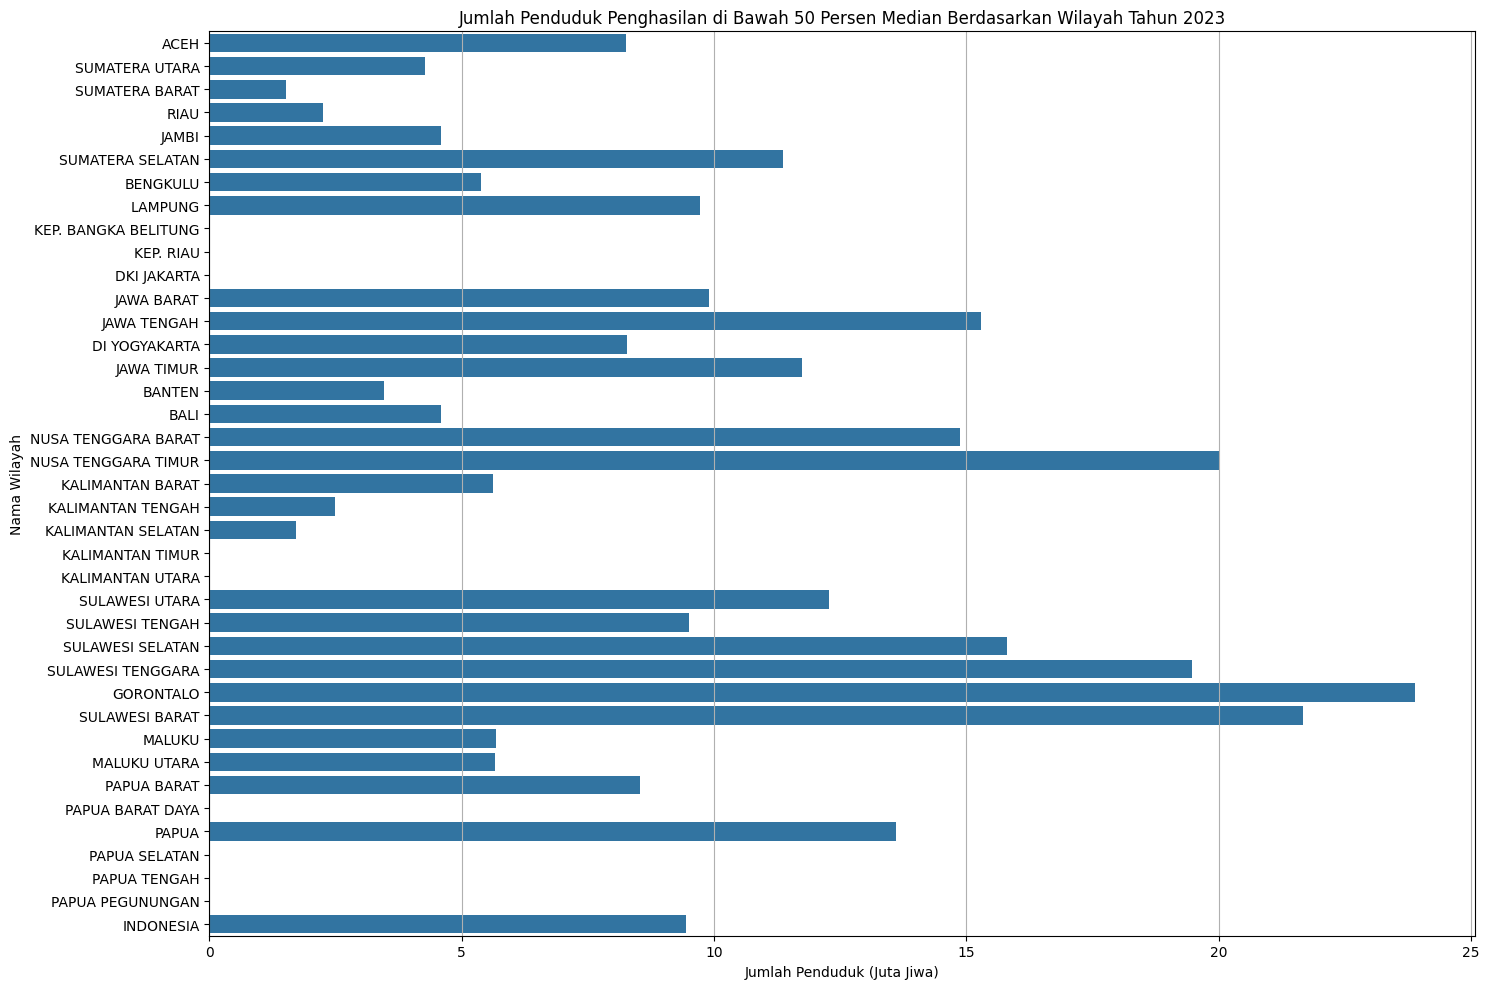

In [ ]:
# Pastikan kolom yang relevan menjadi tipe data numerik (float) menggunakan .loc untuk menghindari SettingWithCopyWarning
penduduk_di_bawah_50_persen_provinsi.loc[:, 'JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)'] = pd.to_numeric(
    penduduk_di_bawah_50_persen_provinsi['JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)'],
    errors='coerce'
)

# Filter data untuk tahun 2023
data_2023 = penduduk_di_bawah_50_persen_provinsi[penduduk_di_bawah_50_persen_provinsi['TAHUN'] == 2023]

# Membuat plot batang
plt.figure(figsize=(15, 10))
sns.barplot(data=data_2023,
            y='NAMA WILAYAH',
            x='JUMLAH PENDUDUK PENGHASILAN DI BAWAH 50 PERSEN MEDIAN (Juta Jiwa)',
            errorbar=None)

# Menambahkan judul dan label
plt.title('Jumlah Penduduk Penghasilan di Bawah 50 Persen Median Berdasarkan Wilayah Tahun 2023')
plt.xlabel('Jumlah Penduduk (Juta Jiwa)')
plt.ylabel('Nama Wilayah')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


- Jawa Barat memiliki jumlah penduduk berpenghasilan di bawah 50 persen median yang tertinggi dibandingkan provinsi lain.
- Jawa Timur dan Jawa Tengah juga menempati peringkat tinggi dalam jumlah penduduk berpenghasilan rendah.
- Papua dan Papua Barat menonjol dengan jumlah penduduk berpenghasilan rendah yang signifikan meskipun populasinya relatif lebih kecil.
- Sulawesi Selatan dan Sumatera Utara memiliki jumlah penduduk dengan penghasilan di bawah 50 persen median yang relatif besar dibandingkan provinsi lain di pulau masing-masing.
- Provinsi di luar Pulau Jawa umumnya memiliki jumlah penduduk berpenghasilan rendah yang lebih kecil dibandingkan provinsi di Jawa, kecuali Papua dan Sulawesi Selatan.
- DKI Jakarta memiliki jumlah penduduk berpenghasilan rendah yang relatif kecil, meskipun populasinya besar.

**Violin Plot untuk Distribusi Tingkat Partisipasi Kerja**

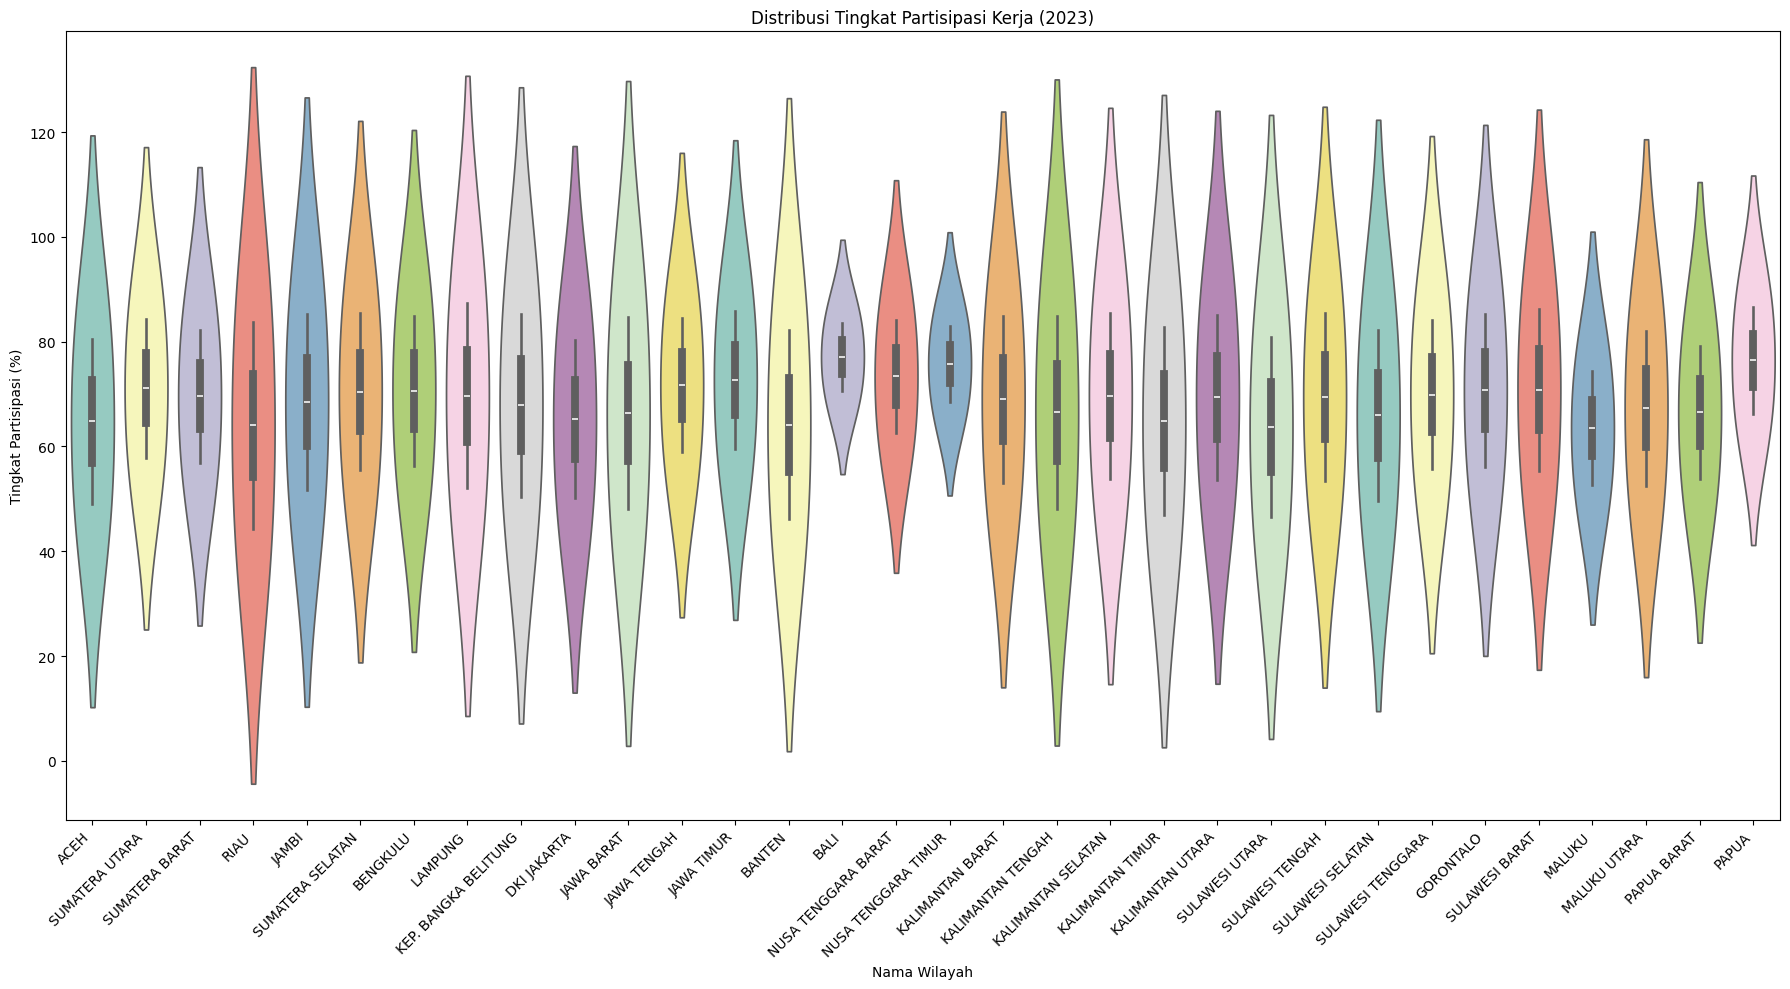

In [ ]:
# Daftar 38 provinsi di Indonesia dalam huruf kapital
daftar_provinsi = [
    'ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI', 'SUMATERA SELATAN',
    'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG', 'KEP. RIAU', 'DKI JAKARTA',
    'JAWA BARAT', 'JAWA TENGAH', 'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI',
    'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN TENGAH',
    'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'SULAWESI UTARA',
    'SULAWESI TENGAH', 'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT',
    'MALUKU', 'MALUKU UTARA', 'PAPUA', 'PAPUA BARAT', 'PAPUA TENGAH', 'PAPUA PEGUNUNGAN',
    'PAPUA SELATAN', 'PAPUA BARAT DAYA'
]

# Filter dataframe berdasarkan daftar provinsi
filtered_df = persentase_tpak_kab_kota[persentase_tpak_kab_kota['NAMA WILAYAH'].isin(daftar_provinsi)]

# Membuat violin plot dengan warna yang berbeda untuk setiap wilayah
plt.figure(figsize=(18, 10))
sns.violinplot(data=filtered_df,
               y='TINGKAT PARTISIPASI (Persen)',
               x='NAMA WILAYAH',
               hue='NAMA WILAYAH',
               palette='Set3',
               dodge=False,
               legend=False)

# Menambahkan judul dan label
plt.title('Distribusi Tingkat Partisipasi Kerja (2023)')
plt.xlabel('Nama Wilayah')
plt.ylabel('Tingkat Partisipasi (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Sebagian besar wilayah memiliki tingkat partisipasi kerja yang terkonsentrasi antara 60-80%, menunjukkan tingkat partisipasi yang relatif stabil secara nasional.
- Provinsi Nusa Tenggara Timur dan Papua menunjukkan variasi yang lebih tinggi, dengan partisipasi kerja yang tersebar lebih luas dari 40% hingga lebih dari 100%.
- Provinsi seperti Aceh, Jawa Barat, dan Sulawesi Selatan menunjukkan tingkat partisipasi yang lebih terpusat dan tidak banyak variasi, mengindikasikan stabilitas partisipasi kerja di wilayah tersebut.
- Rentang interquartile (IQR) yang sempit di beberapa provinsi seperti Lampung dan Jawa Timur menunjukkan bahwa sebagian besar penduduk dalam kelompok usia kerja aktif secara konsisten berpartisipasi dalam pasar kerja.
- Sebaran lebih lebar pada beberapa provinsi, seperti Papua Barat dan Kalimantan Tengah, menunjukkan tingkat ketidakpastian atau fluktuasi yang lebih tinggi dalam partisipasi kerja.
- Outlier pada beberapa wilayah mengindikasikan adanya ekstremitas, baik tingkat partisipasi yang sangat rendah maupun sangat tinggi, di luar distribusi utama.
- Secara umum, fluktuasi partisipasi kerja lebih besar di wilayah-wilayah di bagian timur Indonesia dibandingkan dengan wilayah-wilayah di bagian barat.

###**Analisis Bivariat**
Analisis bivariat adalah teknik analisis data yang melibatkan dua variabel untuk mengeksplorasi hubungan atau keterkaitan di antara keduanya. Tujuannya adalah untuk memahami bagaimana satu variabel mempengaruhi atau berhubungan dengan variabel lainnya.
---

**Countplot untuk Garis Kemiskinan Provinsi, dan Upah Minimum Provinsi**

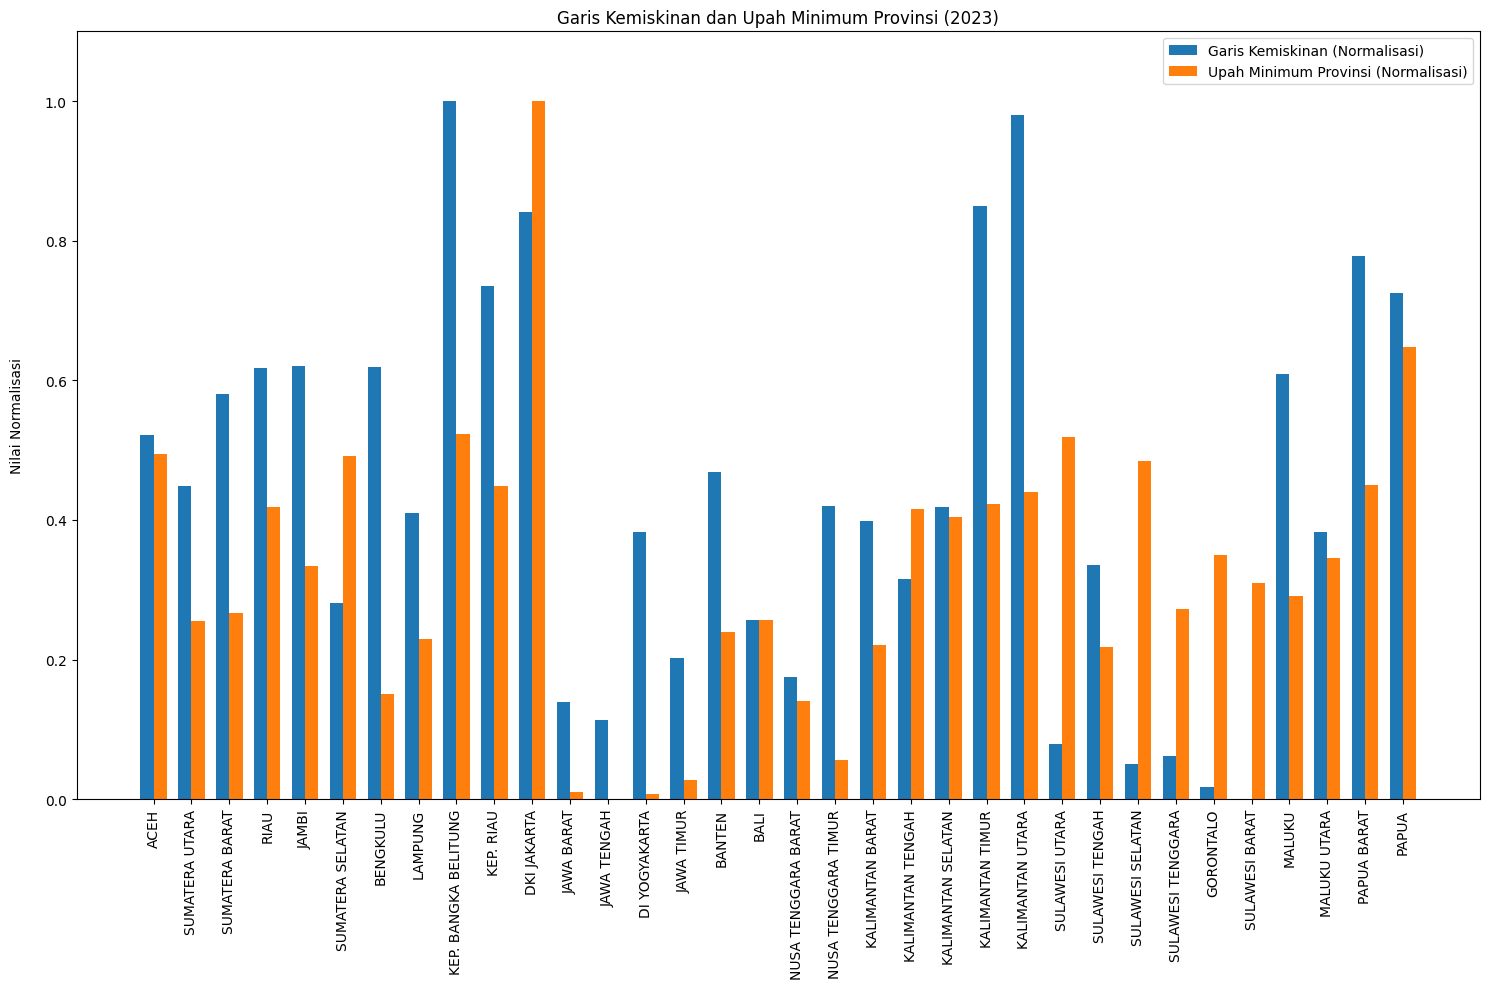

In [ ]:
# Filter data garis kemiskinan pada tahun 2023
garis_kemiskinan_provinsi = garis_kemiskinan_provinsi[garis_kemiskinan_provinsi['TAHUN'] == 2023]

# Gabungkan data garis kemiskinan dan rata-rata upah
df_gabungan_2023 = pd.merge(garis_kemiskinan_provinsi, upah_minimum_provinsi, on=['NAMA WILAYAH'], how='inner')

# Pastikan kolom yang diperlukan adalah dalam format numerik
df_gabungan_2023.loc[:, 'GARIS KEMISKINAN (Rupiah/kapita/bulan)'] = pd.to_numeric(df_gabungan_2023['GARIS KEMISKINAN (Rupiah/kapita/bulan)'], errors='coerce')
df_gabungan_2023.loc[:, 'UPAH MINIMUM (Rupiah)'] = pd.to_numeric(df_gabungan_2023['UPAH MINIMUM (Rupiah)'], errors='coerce')

# Normalisasi Garis Kemiskinan dan UMP
df_gabungan_2023['GARIS KEMISKINAN (Norm)'] = (df_gabungan_2023['GARIS KEMISKINAN (Rupiah/kapita/bulan)'] - df_gabungan_2023['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].min()) / (df_gabungan_2023['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].max() - df_gabungan_2023['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].min())

df_gabungan_2023['UMP 2023 (Norm)'] = (df_gabungan_2023['UPAH MINIMUM (Rupiah)'] - df_gabungan_2023['UPAH MINIMUM (Rupiah)'].min()) / (df_gabungan_2023['UPAH MINIMUM (Rupiah)'].max() - df_gabungan_2023['UPAH MINIMUM (Rupiah)'].min())

# Buat double bar chart
plt.figure(figsize=(15, 10))
width = 0.35
x = np.arange(len(df_gabungan_2023['NAMA WILAYAH']))

# Plot batang untuk Garis Kemiskinan yang dinormalisasi
plt.bar(x - width/2, df_gabungan_2023['GARIS KEMISKINAN (Norm)'], width, label='Garis Kemiskinan (Normalisasi)')

# Plot batang untuk UMP yang dinormalisasi
plt.bar(x + width/2, df_gabungan_2023['UMP 2023 (Norm)'], width, label='Upah Minimum Provinsi (Normalisasi)')

# Sesuaikan label sumbu x
plt.xticks(x, df_gabungan_2023['NAMA WILAYAH'], rotation=90)

# Label sumbu Y dengan jarak lebih
plt.ylabel('Nilai Normalisasi', labelpad=15)

# Menambahkan sedikit ruang di bagian atas sumbu Y
plt.ylim(0, 1.1)  # Normalisasi akan berada di antara 0 dan 1

# Judul dan legenda
plt.title('Garis Kemiskinan dan Upah Minimum Provinsi (2023)')
plt.legend()

# Atur tata letak dan tampilkan plot
plt.tight_layout()
plt.show()


Perbandingan Garis Kemiskinan vs UMP:

- Sebagian besar provinsi memiliki garis kemiskinan (biru) yang lebih tinggi daripada UMP (oranye), kecuali DKI Jakarta dan Kepulauan Riau, di mana UMP lebih tinggi.

- Provinsi dengan Perbedaan Besar:
DKI Jakarta dan Kepulauan Riau memiliki UMP yang jauh di atas garis kemiskinan, sedangkan Papua dan Maluku Utara menunjukkan ketimpangan besar dengan garis kemiskinan yang tinggi dan UMP yang rendah.

- Provinsi dengan UMP Rendah:
Bengkulu, NTB, dan Sulawesi Tenggara menunjukkan UMP rendah dengan garis kemiskinan yang relatif tidak terlalu tinggi.

- Ketimpangan Ekonomi:
Wilayah seperti Papua dan Maluku Utara menghadapi ketidakcukupan UMP untuk menutupi biaya hidup, mengindikasikan adanya masalah ketahanan ekonomi.

- Ketidakcukupan UMP:
Banyak provinsi menunjukkan UMP di bawah garis kemiskinan, yang dapat memperparah kemiskinan.

- Distribusi Kesejahteraan:
Provinsi di luar Jawa, terutama Indonesia Timur, menunjukkan ketidakseimbangan antara UMP dan garis kemiskinan, yang memperlihatkan distribusi kesejahteraan yang tidak merata.

In [ ]:
# Filter data jumlah penduduk dan data kemiskinan untuk wilayah selain 'INDONESIA'
jumlah_penduduk_provinsi_norm = jumlah_penduduk_provinsi[jumlah_penduduk_provinsi['NAMA WILAYAH'] != 'INDONESIA'].copy()
df_kemiskinan_kota_kab_norm = df_kemiskinan_kota_kab[df_kemiskinan_kota_kab['NAMA WILAYAH'] != 'INDONESIA'].copy()

# Konversi kolom 'JUMLAH PENDUDUK (Ribu Jiwa)' dan 'JUMLAH (RIBU JIWA)' ke tipe numerik
jumlah_penduduk_provinsi_norm['JUMLAH PENDUDUK (Ribu Jiwa)'] = pd.to_numeric(jumlah_penduduk_provinsi_norm['JUMLAH PENDUDUK (Ribu Jiwa)'], errors='coerce')
df_kemiskinan_kota_kab_norm['JUMLAH (RIBU JIWA)'] = pd.to_numeric(df_kemiskinan_kota_kab_norm['JUMLAH (RIBU JIWA)'], errors='coerce')

# Hapus data duplikat berdasarkan kolom 'NAMA WILAYAH'
df_kemiskinan_kota_kab_norm = df_kemiskinan_kota_kab_norm.drop_duplicates(subset=['NAMA WILAYAH'])

# Gabungkan data jumlah penduduk dan data kemiskinan berdasarkan kolom 'NAMA WILAYAH'
df_pendmiskin = pd.merge(jumlah_penduduk_provinsi_norm[['NAMA WILAYAH', 'JUMLAH PENDUDUK (Ribu Jiwa)']],
                         df_kemiskinan_kota_kab_norm[['NAMA WILAYAH', 'JUMLAH (RIBU JIWA)']],
                         on='NAMA WILAYAH', how='inner')

# Normalisasi data kemiskinan
df_pendmiskin['JUMLAH (RIBU JIWA)'] = (df_pendmiskin['JUMLAH (RIBU JIWA)'] - df_pendmiskin['JUMLAH (RIBU JIWA)'].min()) / (df_pendmiskin['JUMLAH (RIBU JIWA)'].max() - df_pendmiskin['JUMLAH (RIBU JIWA)'].min())

# Normalisasi data jumlah penduduk
df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'] = (df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'] - df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'].min()) / (df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'].max() - df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'].min())

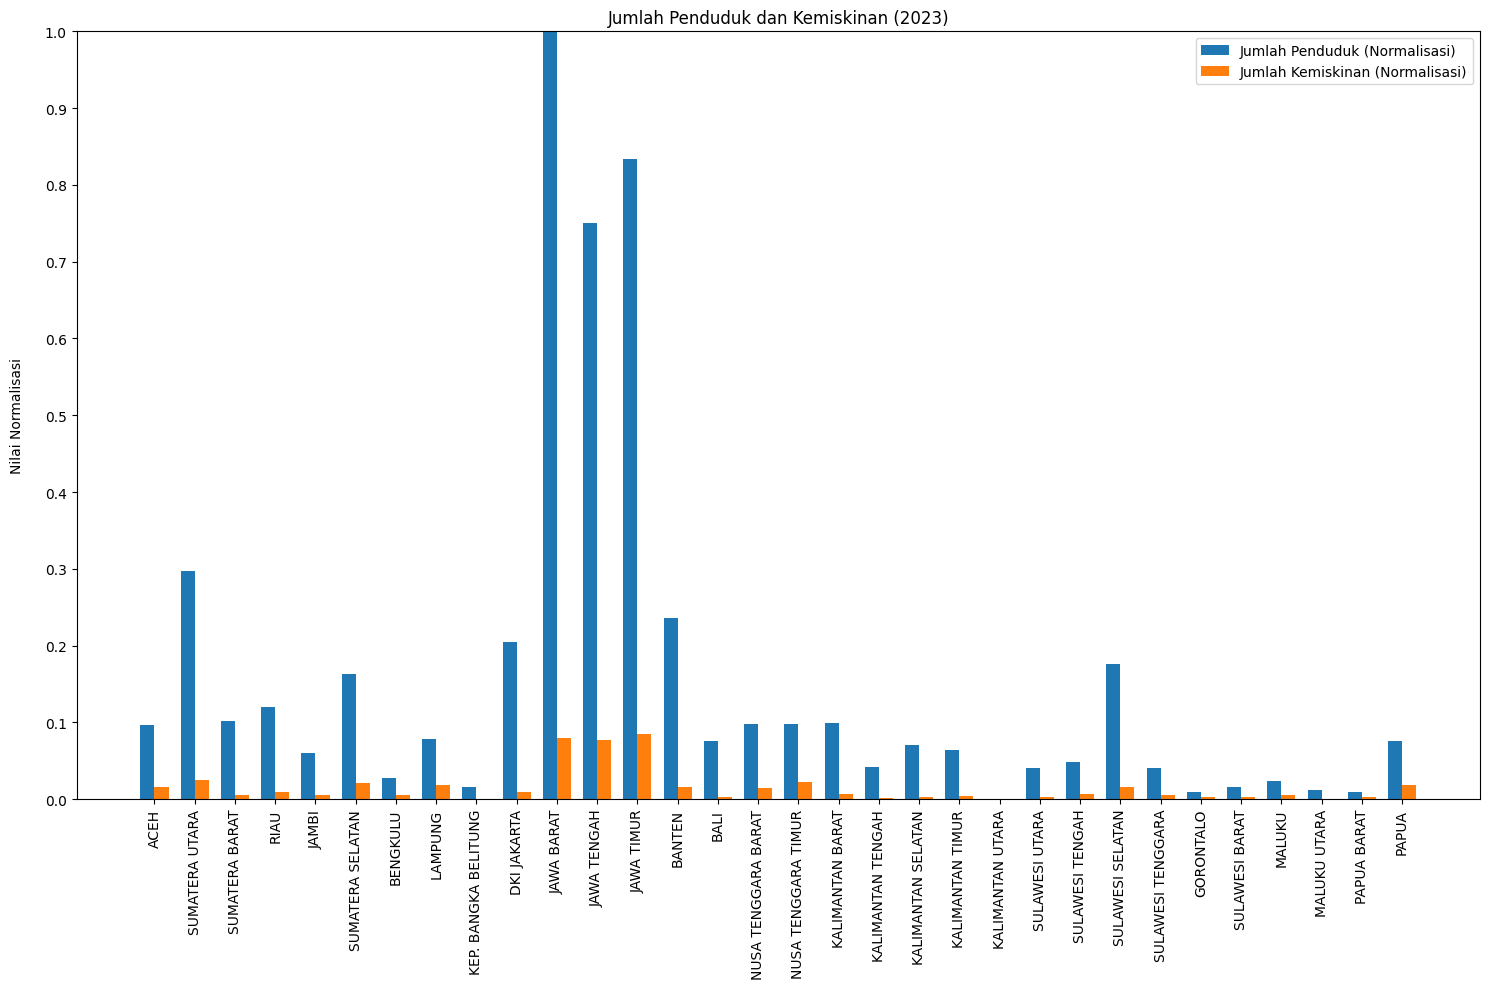

In [ ]:
# Buat double bar chart
plt.figure(figsize=(15, 10))
width = 0.35
x = np.arange(len(df_pendmiskin['NAMA WILAYAH']))

# Plot batang untuk jumlah penduduk yang dinormalisasi
plt.bar(x - width/2, df_pendmiskin['JUMLAH PENDUDUK (Ribu Jiwa)'], width, label='Jumlah Penduduk (Normalisasi)')

# Plot batang untuk jumlah kemiskinan yang dinormalisasi
plt.bar(x + width/2, df_pendmiskin['JUMLAH (RIBU JIWA)'], width, label='Jumlah Kemiskinan (Normalisasi)')

# Sesuaikan label sumbu x
plt.xticks(x, df_pendmiskin['NAMA WILAYAH'], rotation=90)

# Label sumbu Y dengan jarak lebih
plt.ylabel('Nilai Normalisasi', labelpad=15)

# Menambahkan sedikit ruang di bagian atas sumbu Y
plt.ylim(0, 1)  # Normalisasi akan berada di antara 0 dan 1

# Mengatur interval ticks pada sumbu Y agar lebih padat
plt.yticks(np.arange(0, 1.1, 0.1))

# Judul dan legenda
plt.title('Jumlah Penduduk dan Kemiskinan (2023)')
plt.legend()

# Atur tata letak dan tampilkan plot
plt.tight_layout()
plt.show()

- Dominasi Provinsi Jawa: Jawa Barat dan Jawa Timur memiliki jumlah penduduk yang sangat tinggi dibandingkan provinsi lain, dengan perbedaan signifikan dalam populasi.
- Kesenjangan Kemiskinan: Meskipun memiliki populasi tinggi, DKI Jakarta dan Jawa Barat memiliki jumlah kemiskinan yang relatif lebih kecil setelah dinormalisasi dibandingkan provinsi lain seperti Papua dan NTT.
- Provinsi Timur dengan Kemiskinan Tinggi: Papua menunjukkan proporsi kemiskinan yang jauh lebih tinggi dibandingkan jumlah penduduknya, menunjukkan ketimpangan ekonomi yang serius.
- Provinsi dengan Perbandingan Lebih Seimbang: Beberapa provinsi seperti Sumatra Utara dan Jawa Tengah memiliki rasio kemiskinan yang lebih seimbang dengan jumlah penduduk, meskipun tetap menunjukkan kemiskinan yang terlihat.
- Provinsi dengan Penduduk dan Kemiskinan Rendah: Provinsi seperti Kepulauan Riau dan Bangka Belitung memiliki jumlah penduduk dan kemiskinan yang sama-sama rendah.
- Kebutuhan Fokus pada Indonesia Timur: Papua, Papua Barat, dan NTT membutuhkan perhatian khusus terkait kesejahteraan dan ekonomi, karena kemiskinan terlihat lebih tinggi proporsinya dibandingkan provinsi lain.
- Jawa Barat memiliki jumlah penduduk yang paling tinggi dibandingkan dengan provinsi lainnya, seperti terlihat dari bar yang dominan pada grafik, meskipun seperti itu proporsi kemiskinannya relatif lebih rendah dibandingkan dengan jumlah penduduknya.

###**Analisis Multivariat**
Analisis multivariat adalah teknik analisis data yang melibatkan lebih dari dua variabel secara bersamaan untuk memahami hubungan kompleks di antara variabel-variabel tersebut. Tujuan dari analisis ini adalah untuk mengidentifikasi pola, interaksi, atau pengaruh simultan beberapa variabel terhadap variabel lainnya, serta untuk menemukan struktur atau keterkaitan yang tersembunyi dalam data.
---

**Barplot untuk Gini Ratio Provinsi, Kedalaman, dan Keparahan Kemiskinan Provinsi**

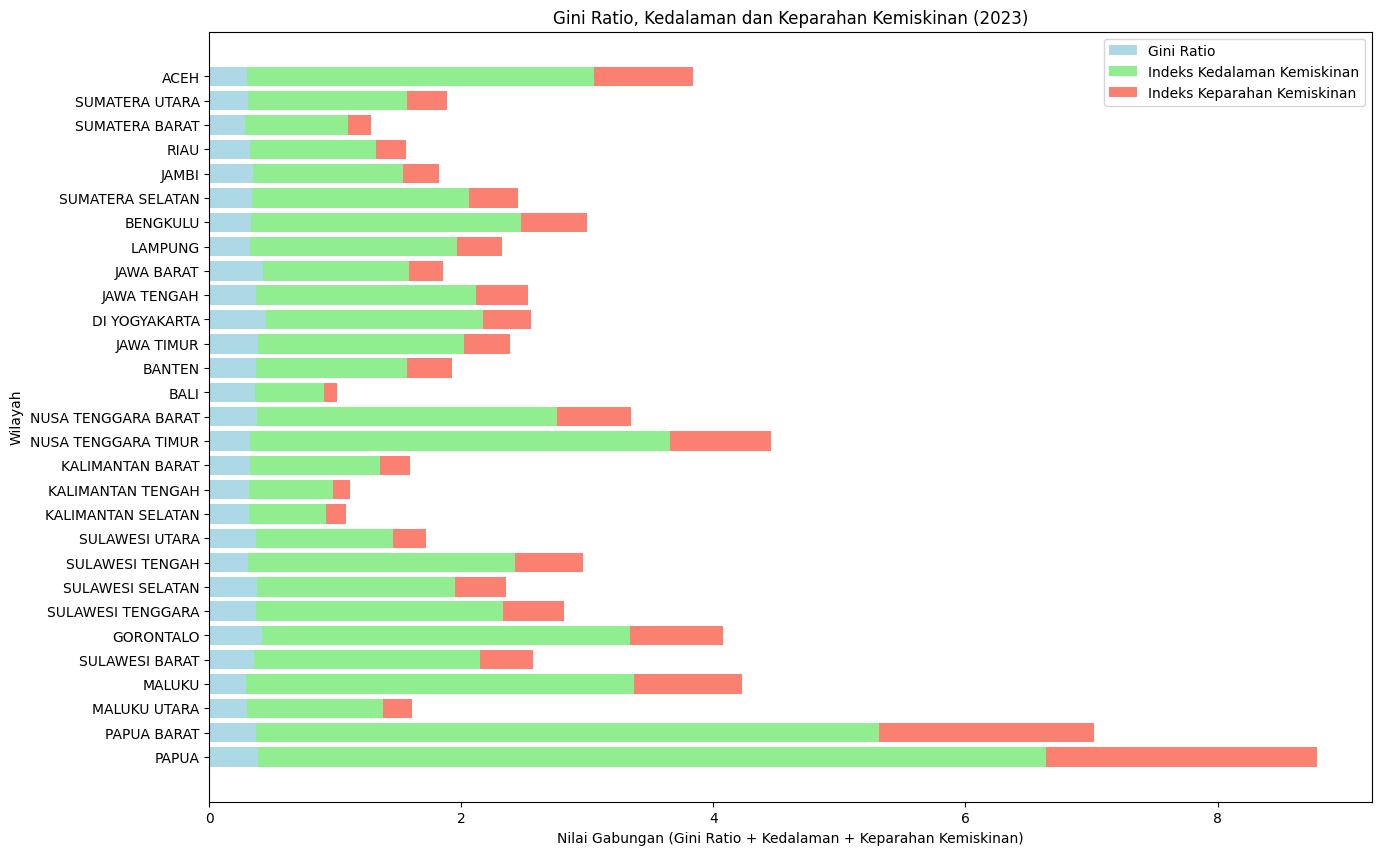

In [ ]:
# Memfilter DataFrame df_kemiskinan untuk tahun 2023 dan tidak termasuk 'INDONESIA'
df_kemiskinan = df_kemiskinan[(df_kemiskinan['TAHUN'] == 2023) & (df_kemiskinan['NAMA WILAYAH'] != 'INDONESIA')].copy()

# Mengubah tipe data kolom 'GINI RATIO', 'INDEKS KEDALAMAN KEMISKINAN', dan 'INDEKS KEPARAHAN KEMISKINAN' menjadi numerik
df_kemiskinan.loc[:, 'GINI RATIO'] = pd.to_numeric(df_kemiskinan['GINI RATIO'], errors='coerce')
df_kemiskinan.loc[:, 'INDEKS KEDALAMAN KEMISKINAN'] = pd.to_numeric(df_kemiskinan['INDEKS KEDALAMAN KEMISKINAN'], errors='coerce')
df_kemiskinan.loc[:, 'INDEKS KEPARAHAN KEMISKINAN'] = pd.to_numeric(df_kemiskinan['INDEKS KEPARAHAN KEMISKINAN'], errors='coerce')

# Mengatur ukuran plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot stacked bar chart
bar1 = ax.barh(df_kemiskinan['NAMA WILAYAH'], df_kemiskinan['GINI RATIO'], label='Gini Ratio', color='lightblue')
bar2 = ax.barh(df_kemiskinan['NAMA WILAYAH'], df_kemiskinan['INDEKS KEDALAMAN KEMISKINAN'],
               left=df_kemiskinan['GINI RATIO'], label='Indeks Kedalaman Kemiskinan', color='lightgreen')
bar3 = ax.barh(df_kemiskinan['NAMA WILAYAH'], df_kemiskinan['INDEKS KEPARAHAN KEMISKINAN'],
               left=df_kemiskinan['GINI RATIO'] + df_kemiskinan['INDEKS KEDALAMAN KEMISKINAN'],
               label='Indeks Keparahan Kemiskinan', color='salmon')

# Menambahkan label dan title
ax.set_xlabel('Nilai Gabungan (Gini Ratio + Kedalaman + Keparahan Kemiskinan)')
ax.set_ylabel('Wilayah')
ax.set_title('Gini Ratio, Kedalaman dan Keparahan Kemiskinan (2023)')

# Membalik sumbu y
ax.invert_yaxis()

# Menampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()


- Papua memiliki nilai gabungan tertinggi dari ketiga indikator tersebut.
- Papua Barat juga menunjukkan nilai gabungan yang tinggi, khususnya pada Indeks Keparahan Kemiskinan.
- Maluku Utara memiliki nilai gabungan yang relatif rendah dibandingkan wilayah lainnya.
- Bali menunjukkan nilai gabungan yang sangat rendah, terutama pada Indeks Kedalaman dan Keparahan Kemiskinan.
- Nusa Tenggara Barat memiliki Indeks Keparahan Kemiskinan yang cukup tinggi dibandingkan dengan wilayah lain.
- Jawa Timur menunjukkan nilai gabungan yang cukup tinggi, terutama pada Indeks Keparahan Kemiskinan.
- Sumatera Barat dan Sumatera Selatan memiliki nilai gabungan yang cukup tinggi pada Indeks Keparahan Kemiskinan.
- Sulawesi Tengah memiliki nilai gabungan yang signifikan pada Indeks Kedalaman dan Keparahan Kemiskinan.
- Sulawesi Selatan menunjukkan nilai gabungan yang cukup tinggi pada semua indikator.
- Banten menunjukkan nilai gabungan yang relatif rendah, terutama pada Indeks Kedalaman dan Keparahan Kemiskinan.
- Aceh dan Sumatera Utara memiliki nilai gabungan yang rendah pada ketiga indikator.
- Yogyakarta menunjukkan nilai gabungan yang relatif rendah, terutama pada Indeks Keparahan Kemiskinan.
- Jawa Barat dan Jawa Tengah memiliki nilai gabungan yang cukup rendah pada Indeks Kedalaman dan Keparahan Kemiskinan.

In [ ]:
df_kemiskinan_minmax_scaled = df_kemiskinan.copy()

df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'] = pd.to_numeric(df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'], errors='coerce')
df_kemiskinan_minmax_scaled['GINI RATIO'] = pd.to_numeric(df_kemiskinan_minmax_scaled['GINI RATIO'], errors='coerce')

df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'] = (df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'] - df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].min()) / (df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].max() - df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'].min())
df_kemiskinan_minmax_scaled['GINI RATIO'] = (df_kemiskinan_minmax_scaled['GINI RATIO'] - df_kemiskinan_minmax_scaled['GINI RATIO'].min()) / (df_kemiskinan_minmax_scaled['GINI RATIO'].max() - df_kemiskinan_minmax_scaled['GINI RATIO'].min())
df_kemiskinan_minmax_scaled

df_pengangguran_minmax_scaled = df_pengangguran.copy()

df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'] = pd.to_numeric(df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'], errors='coerce')
df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'] = pd.to_numeric(df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'], errors='coerce')

df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'] = (df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'] - df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'].min()) / (df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'].max() - df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'].min())
df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'] = (df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'] - df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'].min()) / (df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'].max() - df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'].min())

rata_upah_perjam_minmax_scaled = rata_upah_perjam_provinsi.copy()
rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'] = pd.to_numeric(rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'],errors='coerce')
rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'] = (rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'] - rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'].min()) / (rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'].max() - rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'].min())

upah_minimum_provinsi = upah_minimum_provinsi.copy()
upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'] = (upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'] - upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'].min()) / (upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'].max() - upah_minimum_provinsi['UPAH MINIMUM (Rupiah)'].min())

**Pair Plot untuk Garis Kemiskinan Provinsi, Gini Ratio Provinsi, Tingkat Setengah Pengangguran, dan Tingkat Pengangguran Terbuka**

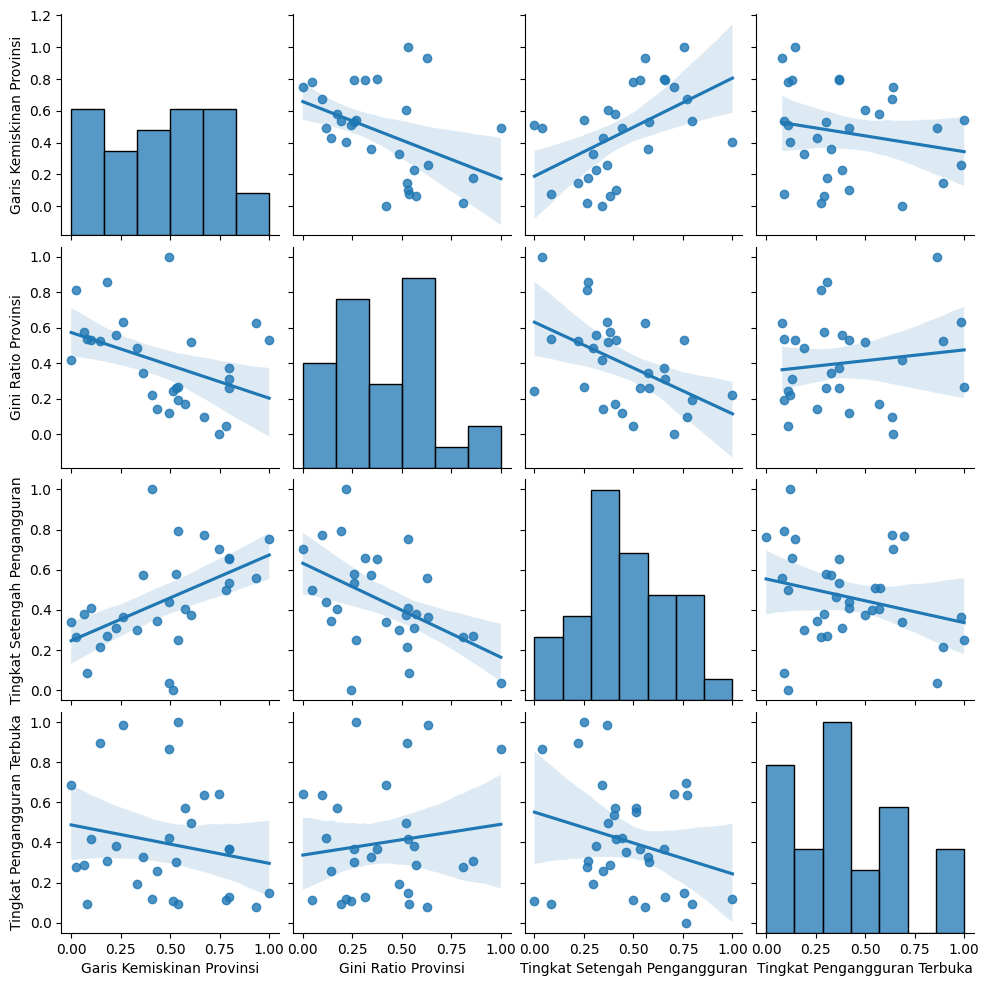

In [ ]:
# Membuat dataframe baru 'df_pplot1' yang berisi kolom-kolom terkait garis kemiskinan, gini ratio, tingkat setengah pengangguran, dan tingkat terbuka
df_pplot1 = pd.DataFrame({
    'Garis Kemiskinan Provinsi': df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'],
    'Gini Ratio Provinsi': df_kemiskinan_minmax_scaled['GINI RATIO'],
    'Tingkat Setengah Pengangguran': df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'],
    'Tingkat Pengangguran Terbuka': df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'],
})

# Membuat pairplot
sns.pairplot(df_pplot1, kind='reg')

# Tampilkan plot hasil pairplot
plt.show()

**Pair Plot untuk Garis Kemiskinan Provinsi, Gini Ratio Provinsi, Rata Upah Provinsi, dan Upah Minimum Provinsi**

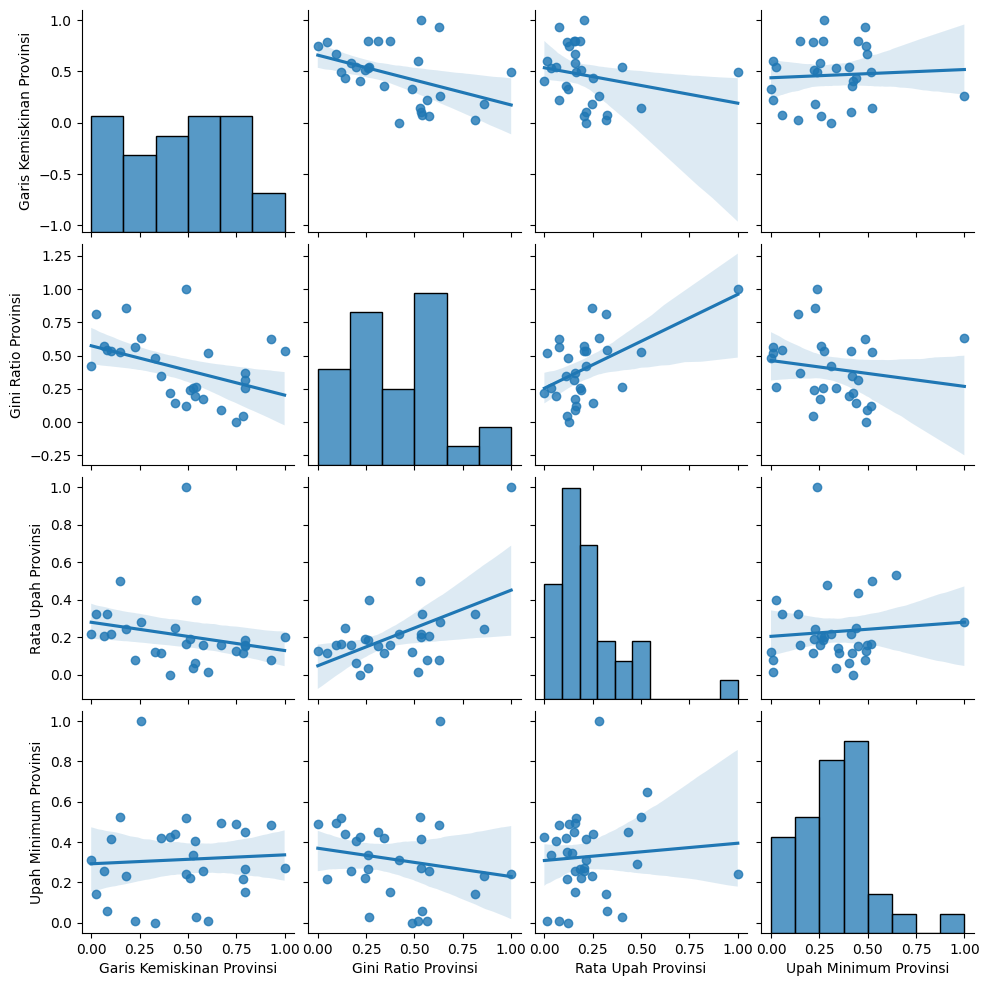

In [ ]:
# Membuat dataframe baru 'df_pplot2' yang berisi kolom-kolom terkait garis kemiskinan, gini ratio, rata-rata upah, dan upah minimum sesuai provinsi
df_pplot2 = pd.DataFrame({
    'Garis Kemiskinan Provinsi': df_kemiskinan_minmax_scaled['GARIS KEMISKINAN (Rupiah/kapita/bulan)'],
    'Gini Ratio Provinsi': df_kemiskinan_minmax_scaled['GINI RATIO'],
    'Rata Upah Provinsi': rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'],
    'Upah Minimum Provinsi': upah_minimum_provinsi['UPAH MINIMUM (Rupiah)']
})

# Membuat pairplot
sns.pairplot(df_pplot2, kind='reg')


# Tampilkan plot hasil pairplot
plt.show()

**Pair Plot untuk Tingkat Setengah Pengangguran, Tingkat Pengangguran Terbuka, Rata Upah Provinsi, dan Upah Minimum Provinsi**

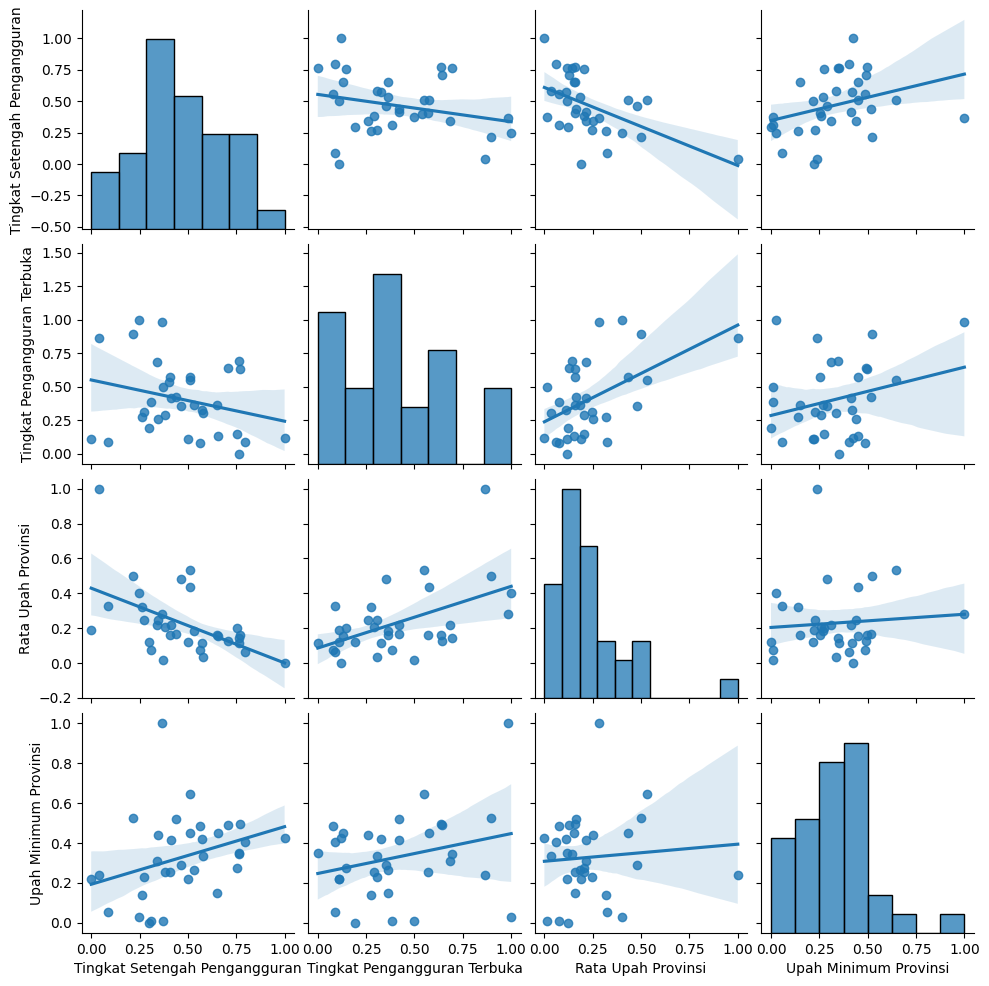

In [ ]:
# Membuat dataframe baru 'df_pplot3' yang berisi kolom-kolom tingkat setengah pengangguran, tingkat pengangguran, rata-rata upah, dan upah minimum provinsi
df_pplot3 = pd.DataFrame({
    'Tingkat Setengah Pengangguran': df_pengangguran_minmax_scaled['TINGKAT SETENGAH PENGANGGURAN (Persen)'],
    'Tingkat Pengangguran Terbuka': df_pengangguran_minmax_scaled['TINGKAT PENGANGGURAN TERBUKA (Persen)'],
    'Rata Upah Provinsi': rata_upah_perjam_minmax_scaled['RATA UPAH (Rupiah/jam)'],
    'Upah Minimum Provinsi': upah_minimum_provinsi['UPAH MINIMUM (Rupiah)']
})

# Membuat pairplot
sns.pairplot(df_pplot3, kind='reg')

# Tampilkan plot hasil pairplot
plt.show()


**Matriks Korelasi dari Ketiga Pair Plot**

In [ ]:
df_pplot1.corr()

,Garis Kemiskinan Provinsi,Gini Ratio Provinsi,Tingkat Setengah Pengangguran,Tingkat Pengangguran Terbuka
Garis Kemiskinan Provinsi,1.000000,-0.423844,0.513453,-0.195179
Gini Ratio Provinsi,-0.423844,1.000000,-0.491847,0.136596
Tingkat Setengah Pengangguran,0.513453,-0.491847,1.000000,-0.258802
Tingkat Pengangguran Terbuka,-0.195179,0.136596,-0.258802,1.000000


Berdasarkan matriks korelasi di atas, berikut adalah kesimpulan antara atribut-atribut:
* Garis kemiskinan memiliki korelasi negatif lemah dengan gini ratio. Ini berarti semakin tinggi tingkat kemiskinan, cenderung semakin rendah ketimpangan pendapatan (gini ratio). Namun, korelasi ini tidak terlalu kuat.
* Garis kemiskinan memiliki korelasi positif sedang dengan tingkat setengah pengangguran. Artinya, semakin tinggi tingkat kemiskinan, cenderung semakin tinggi pula tingkat setengah pengangguran.
*Garis kemiskinan memiliki korelasi negatif lemah dengan tingkat pengangguran terbuka. Ini berarti semakin tinggi tingkat kemiskinan, cenderung semakin rendah tingkat pengangguran terbuka.


In [ ]:
df_pplot2.corr()

,Garis Kemiskinan Provinsi,Gini Ratio Provinsi,Rata Upah Provinsi,Upah Minimum Provinsi
Garis Kemiskinan Provinsi,1.000000,-0.423844,-0.227988,0.059521
Gini Ratio Provinsi,-0.423844,1.000000,0.533505,-0.165311
Rata Upah Provinsi,-0.227988,0.533505,1.000000,0.080597
Upah Minimum Provinsi,0.059521,-0.165311,0.080597,1.000000


Berdasarkan matriks korelasi di atas, berikut adalah kesimpulan antara atribut-atribut:
* Garis kemiskinan memiliki korelasi negatif lemah dengan gini ratio dan rata-rata upah. Ini menunjukkan tren yang sama seperti pada matriks pertama, yaitu semakin tinggi kemiskinan, cenderung semakin rendah ketimpangan dan rata-rata upah.
* Garis kemiskinan memiliki korelasi positif sangat lemah dengan upah minimum provinsi. Korelasi ini hampir mendekati nol, artinya hampir tidak ada hubungan antara keduanya.


In [ ]:
df_pplot3.corr()

,Tingkat Setengah Pengangguran,Tingkat Pengangguran Terbuka,Rata Upah Provinsi,Upah Minimum Provinsi
Tingkat Setengah Pengangguran,1.000000,-0.258802,-0.516684,0.326809
Tingkat Pengangguran Terbuka,-0.258802,1.000000,0.505530,0.268341
Rata Upah Provinsi,-0.516684,0.505530,1.000000,0.080597
Upah Minimum Provinsi,0.326809,0.268341,0.080597,1.000000


Berdasarkan matriks korelasi di atas, berikut adalah kesimpulan antara atribut-atribut:

* Tingkat setengah pengangguran memiliki korelasi negatif sedang dengan rata-rata upah. Ini menunjukkan bahwa semakin tinggi tingkat setengah pengangguran, cenderung semakin rendah rata-rata upah.
* Tingkat setengah pengangguran memiliki korelasi positif sedang dengan upah minimum provinsi. Ini berarti semakin tinggi tingkat setengah pengangguran, cenderung semakin tinggi upah minimum provinsi.


## **Kesimpulan**
---

### **Simpulan**

Beberapa temuan utama dari analisis ini adalah sebagai berikut:
1. Hubungan Garis Kemiskinan dengan Indikator Sosial dan Ekonomi:
   - Korelasi Negatif dengan Gini Ratio: Terdapat korelasi negatif lemah antara garis kemiskinan dan gini ratio, menunjukkan bahwa peningkatan kemiskinan cenderung diikuti oleh penurunan ketimpangan pendapatan, meskipun hubungan ini tidak terlalu kuat.
   - Korelasi Positif dengan Tingkat Setengah Pengangguran: Terdapat korelasi positif sedang antara garis kemiskinan dan tingkat setengah pengangguran, mengindikasikan bahwa peningkatan kemiskinan cenderung diikuti oleh peningkatan setengah pengangguran.
   - Korelasi Negatif dengan Tingkat Pengangguran Terbuka: Terdapat korelasi negatif lemah antara garis kemiskinan dan tingkat pengangguran terbuka, menunjukkan bahwa peningkatan kemiskinan cenderung diikuti oleh penurunan tingkat pengangguran terbuka.
   - Korelasi dengan Upah: Garis kemiskinan memiliki korelasi negatif lemah dengan rata-rata upah dan korelasi positif sangat lemah dengan upah minimum provinsi, menunjukkan bahwa kemiskinan tidak terlalu dipengaruhi oleh rata-rata upah dan upah minimum provinsi.

2. Distribusi Populasi dan Upah:
   - Dominasi Pulau Jawa: Jawa mendominasi populasi dengan jumlah penduduk tertinggi, khususnya di bagian tengah pulau. Pulau-pulau lain seperti Sumatera bagian utara juga memiliki populasi besar, sedangkan wilayah Timur Indonesia seperti Papua memiliki populasi yang lebih rendah.
   - Distribusi Upah Minimum: Provinsi di Jawa dan Sumatera memiliki upah minimum yang relatif tinggi dibandingkan dengan provinsi di Indonesia timur. Jawa Barat dan DKI Jakarta memiliki upah minimum tertinggi di Indonesia, sedangkan Papua dan Maluku memiliki upah minimum yang lebih rendah.
   - Kesenjangan Ekonomi: Terdapat kesenjangan ekonomi antarwilayah yang terlihat dari perbedaan upah minimum, di mana wilayah dengan aktivitas ekonomi tinggi seperti Jawa, Sumatera, dan Kalimantan cenderung memiliki upah lebih besar. Papua, meskipun kaya mineral, memiliki upah per jam yang relatif rendah.

3. Garis Kemiskinan dan Ketidakmerataan:
   - Perbedaan Antarprovinsi: Garis kemiskinan di Indonesia berkisar sekitar 700.000 rupiah per kapita per bulan, lebih rendah dibandingkan dengan beberapa provinsi seperti Papua, Papua Barat, dan Maluku Utara. Beberapa provinsi seperti Papua menunjukkan garis kemiskinan yang lebih tinggi, mengindikasikan perbedaan signifikan antarprovinsi yang dipengaruhi oleh biaya hidup dan ketersediaan sumber daya.
   - Ketimpangan UMP dan Garis Kemiskinan: Sebagian besar provinsi memiliki garis kemiskinan yang lebih tinggi daripada UMP, kecuali DKI Jakarta dan Kepulauan Riau. Ketidakcukupan UMP untuk menutupi biaya hidup terlihat di banyak provinsi, memperparah kemiskinan di wilayah tersebut.

4. Tingkat Partisipasi Kerja:
   - Stabilitas Partisipasi Kerja: Sebagian besar wilayah menunjukkan tingkat partisipasi kerja yang terkonsentrasi antara 60-80%, menunjukkan stabilitas partisipasi kerja secara nasional. Namun, provinsi seperti Nusa Tenggara Timur dan Papua menunjukkan variasi yang lebih tinggi dalam partisipasi kerja.
   - Fluktuasi Partisipasi Kerja: Wilayah-wilayah di bagian timur Indonesia menunjukkan fluktuasi yang lebih besar dalam partisipasi kerja dibandingkan dengan wilayah di bagian barat.

### **Saran**

Berdasarkan kesimpulan di atas, beberapa saran yang dapat diberikan adalah:
1. Pengurangan Ketimpangan Ekonomi:
   - Pengembangan Infrastruktur dan Ekonomi di Indonesia Timur: Pemerintah perlu fokus pada pembangunan infrastruktur dan pengembangan ekonomi di wilayah-wilayah seperti Papua, Papua Barat, dan NTT untuk mengurangi ketimpangan ekonomi dan meningkatkan kesejahteraan masyarakat di wilayah tersebut.
   - Peningkatan Upah Minimum: Peninjauan dan peningkatan upah minimum di provinsi-provinsi dengan garis kemiskinan tinggi dapat membantu mengurangi kemiskinan dan meningkatkan daya beli masyarakat.

2. Peningkatan Kesempatan Kerja:
   - Program Pelatihan dan Ketenagakerjaan: Implementasi program pelatihan keterampilan dan peningkatan kesempatan kerja di wilayah-wilayah dengan tingkat setengah pengangguran yang tinggi dapat membantu mengurangi pengangguran dan meningkatkan rata-rata upah.
   - Peningkatan Partisipasi Kerja: Pemerintah perlu mengidentifikasi dan mengatasi faktor-faktor yang menyebabkan fluktuasi dalam partisipasi kerja, terutama di wilayah-wilayah dengan variasi yang tinggi seperti Nusa Tenggara Timur dan Papua.

3. Peningkatan Data dan Penelitian:
   - Pengumpulan Data yang Lebih Baik: Provinsi-provinsi baru seperti Papua Barat Daya, Papua Selatan, Papua Tengah, dan Papua Pegunungan memerlukan perhatian khusus dalam pengumpulan data untuk mendapatkan gambaran yang lebih akurat mengenai kondisi ekonomi dan sosial di wilayah tersebut.
   - Penelitian Lanjutan: Penelitian lebih lanjut diperlukan untuk memahami lebih dalam tentang keterkaitan antara upah, ketenagakerjaan, dan kemiskinan, serta untuk mengidentifikasi solusi yang efektif dalam mengurangi kemiskinan dan ketimpangan ekonomi di Indonesia.

